# **GWU Doctoral Cyber Security Alaytics: Praxis Research**

# **A Holistic Approach to Enable Dynamic Policy Management for Zero Trust Architecture**

## Jody Spearing

## July 2025

## V3.5

##  **OPTICS Clustering Overview**

**Section 1:** Create Running Environment
*   Install / Import Libraries
*   Validate Runtime
* Load Data: create dataframe = df_0

**Section 2:** Basic Data Exploration on df_0

**Section 3:** Preprocessing on df_1

**Section 4:** Functions

**Section 5:** Model OPTICS Defined Clusters

**Section 6:** Calculate Metrics

**Section 7:** Display Visualizations

**Section 8:** Analyze Results

### **Section 1: Install / Import Libraries**

In [ ]:
######################################################################################################################
# Install Necessary Libraries
######################################################################################################################

!apt-get -y install cuda
!pip install pycuda
!pip install cuda-python
!pip install cudf-cu11
#!pip install --upgrade rmm
#!pip install cupy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cpp-12 cuda-12-9 cuda-cccl-12-9 cuda-command-line-tools-12-9
  cuda-compiler-12-9 cuda-crt-12-9 cuda-cudart-12-9 cuda-cudart-dev-12-9
  cuda-cuobjdump-12-9 cuda-cupti-12-9 cuda-cupti-dev-12-9 cuda-cuxxfilt-12-9
  cuda-demo-suite-12-9 cuda-documentation-12-9 cuda-driver-dev-12-9
  cuda-gdb-12-9 cuda-libraries-12-9 cuda-libraries-dev-12-9 cuda-nsight-12-9
  cuda-nsight-compute-12-9 cuda-nsight-systems-12-9 cuda-nvcc-12-9
  cuda-nvdisasm-12-9 cuda-nvml-dev-12-9 cuda-nvprof-12-9 cuda-nvprune-12-9
  cuda-nvrtc-12-9 cuda-nvrtc-dev-12-9 cuda-nvtx-12-9 cuda-nvvm-12-9
  cuda-nvvp-12-9 cuda-opencl-12-9 cuda-profiler-api-12-9 cuda-runtime-12-9
  cuda-sandbox-dev-12-9 cuda-sanitizer-12-9 cuda-toolkit-12-9
  cuda-toolkit-12-9-config-common cuda-tools-12-9 cuda-visual-tools-12-9
  dctrl-tools default-jre default-jre-headless dkms fakeroot fonts-dejav

In [ ]:
######################################################################################################################
## Import Python libraries
######################################################################################################################

import pandas as pd
import numpy as np
from datetime import datetime
import time
import os
from google.colab import drive
import logging
#import cudf
import cupy as cp
from math import comb
from psutil import virtual_memory
import tensorflow as tf
import torch
import gc


from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

# Preprocessing Libraries
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import TruncatedSVD

#Clustering Metrics Libraries
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import pairwise_distances

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score

# Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

/usr/local/lib/python3.11/dist-packages/cupy/_environment.py:541: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy-cuda11x, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


# **Section 1: Validate Runtime**

In [ ]:
######################################################################################################################
# Get GPU info
# Run the 'nvidia-smi' command to get GPU status information.
# The '!' syntax is used in environments like Jupyter Notebooks to execute shell commands.
# Join the output list into a single string separated by newline characters.
# Check if the word 'failed' appears in the output, which may indicate no GPU is connected or accessible.
# Inform the user that no GPU is connected.
# Otherwise, print the GPU information retrieved.
######################################################################################################################

# Colab GPU Configuration
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon May  5 16:58:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             43W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
######################################################################################################################
# check CUDA version
######################################################################################################################

!nvidia-smi

#Use cudf.pandas as a magic
#%load_ext cudf.pandas

Mon May  5 16:58:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             43W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
######################################################################################################################
# Get memory info
# Import the virtual_memory function from the psutil module
# psutil is a cross-platform library for retrieving system information like CPU, memory, disks, etc.
# Get the total available RAM in bytes and convert it to gigabytes by dividing by 1e9 (1,000,000,000)
# Print the amount of available RAM with one decimal place

# Check if the available RAM is less than 20 GB
# If so, inform the user that this is not a high-RAM runtime
# Otherwise, inform the user they are using a high-RAM runtime
######################################################################################################################

# Memory Configurtion
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
######################################################################################################################
# Environment Setup
# Set Logging
# Set Utilization to 90-100% during training
######################################################################################################################

logging.basicConfig(level=logging.INFO)
!nvidia-smi

Mon May  5 16:58:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             43W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

# **Section 1: Load Data: Original Dataframe = df_0**

In [1]:
######################################################################################################################
# get / set working directory
# List Contents of working directory
######################################################################################################################

# Check if drive is already mounted before attempting to mount again
# Use force_remount=True to remount if it is already mounted.
if not os.path.exists('/content/gdrive'):

    drive.mount('/content/gdrive', force_remount=True)
else:
    print("Drive is already mounted.")

!ls "/content/gdrive/My Drive"

In [ ]:
######################################################################################################################
# Load Data file into dataframe 'df_0' denoting original
# Define the path to the Google Drive directory where the dataset is stored
# Define the name of the dataset file
# Combine the path and filename into a full path to the data file
# Optional: Limit the number of rows read for testing large files (commented out)
# nRowsRead random sample used for testing
# Read the CSV file into a pandas DataFrame
# Optionally, you could use nrows=nRowsRead for testing large datasets
# Print the first few rows of the DataFrame to verify that the file was read correctly
# Handle case where the file path is incorrect or file is missing
# Handle case where the CSV file has formatting issues and can't be parsed
# Catch any other unexpected exceptions and print the error message
######################################################################################################################

drive_path = '/content/gdrive/My Drive/GWU/Praxis/data/'
data = 'Dataset-Unicauca-Version2-87Atts 2.csv'
data_file = drive_path + data
nRowsRead = 1_500_000


try:
  # load full file
  df_0 = pd.read_csv(data_file)

  # Load random Sample
  df_sampled = df_0.sample(n=nRowsRead, random_state=42)

  print(df_0.shape)
  print(df_sampled.shape)
  #print(df.head()) # Print the first few rows to verify

except FileNotFoundError:
  print(f"Error: File not found at {data_file}")
except pd.errors.ParserError:
  print(f"Error: Unable to parse the file at {data_file}. Check file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

(3577296, 87)
(1500000, 87)


In [ ]:
######################################################################################################################
# validate df shape
######################################################################################################################

#df_0 = df_sampled.copy()
df_0.shape

(3577296, 87)

# **Section 2: Basic Data Exploration on df_0**

In [ ]:
######################################################################################################################
# Basic Data Exploration
# Print the shape of the dataset (rows, columns)
# Print concise summary of the DataFrame: column names, non-null counts, and data types
# Print descriptive statistics for numeric columns (count, mean, std, min, etc.)
# Print the list of column names
# Print the first 5 rows of the dataset
# Print the last 5 rows of the dataset
# Print the count of missing (null) values for each column
# Print the number of duplicated rows in the dataset
# Print the number of unique values for each column
# Print the data type of each column
# Print the memory usage of each column
######################################################################################################################

print('------------------------------------------------------------')
print('DATASET SHAPE')
print('------------------------------------------------------------')
print(df_0.shape)
print('------------------------------------------------------------')
print('DATASET INFO')
print('------------------------------------------------------------')
print(df_0.info())
print('------------------------------------------------------------')
print('DATASET DESCRIBE')
print('------------------------------------------------------------')
print(df_0.describe())
print('------------------------------------------------------------')
print('DATASET COLUMNS')
print('------------------------------------------------------------')
print(df_0.columns)
print('------------------------------------------------------------')
print('DATASET HEAD')
print('------------------------------------------------------------')
print(df_0.head())
print('------------------------------------------------------------')
print('DATASET TAIL')
print('------------------------------------------------------------')
print(df_0.tail())
print('------------------------------------------------------------')
print('DATASET NULL VALUES')
print('------------------------------------------------------------')
print(df_0.isnull().sum())
print('------------------------------------------------------------')
print('DATASET DUPLICATE VALUES')
print('------------------------------------------------------------')
print(df_0.duplicated().sum())
print('------------------------------------------------------------')
print('DATASET UNIQUE VALUES')
print('------------------------------------------------------------')
print(df_0.nunique())
print('------------------------------------------------------------')
print('DATASET DATA TYPES')
print('------------------------------------------------------------')
print('dataset dtypes = ',df_0.dtypes)
print('------------------------------------------------------------')
print('DATASET MEMORY USAGE')
print('------------------------------------------------------------')
print(df_0.memory_usage())
print('------------------------------------------------------------')

------------------------------------------------------------
DATASET SHAPE
------------------------------------------------------------
(3577296, 87)
------------------------------------------------------------
DATASET INFO
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577296 entries, 0 to 3577295
Data columns (total 87 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow.ID                      object 
 1   Source.IP                    object 
 2   Source.Port                  int64  
 3   Destination.IP               object 
 4   Destination.Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow.Duration                int64  
 8   Total.Fwd.Packets            int64  
 9   Total.Backward.Packets       int64  
 10  Total.Length.of.Fwd.Packets  int64  
 11  Total.Length.of.Bwd.Packets  float64
 12  Fwd.Packe

# **Section 3: Preprocessing on df_0**

In [ ]:
######################################################################################################################
# Handle missing or invalid values
# Check for null values
# Drop rows with any null values
# Fill nulls with a default value (e.g., 0 or "Unknown") or df.fillna("Unknown") for categorical
# Fill nulls with forward fill or backward fill
######################################################################################################################

print("Null values in each column:")
print(df_0.isnull().sum())

#df_dropna = df_0.dropna()
#df_fillna = df_0.fillna(0)

#df_ffill = df_0.fillna(method='ffill')  # forward fill
#df_bfill = df_0.fillna(method='bfill')  # backward fill

Null values in each column:
Flow.ID             0
Source.IP           0
Source.Port         0
Destination.IP      0
Destination.Port    0
                   ..
Idle.Max            0
Idle.Min            0
Label               0
L7Protocol          0
ProtocolName        0
Length: 87, dtype: int64


# **Section 4: Feature Selection**

# **Section 5: Functions**

In [ ]:
######################################################################################################################
#. Write results csv file to drive
######################################################################################################################

def write_labeled_df_tocsv_timestamp(output_file, output_dir, timestamp):

  try:
    print("Writing the file to ..." + output_dir)
    df_0.to_csv(output_path, index=False)
    print(f"Dataset written with shape: {df_0.shape}")

  except FileNotFoundError:
      print(f"Error: File not found at {output_dir}")
      return []
  except pd.errors.ParserError:
      print(f"Error: Unable to parse the file at {output_dir}. Check the file format.")
      return []
  except Exception as e:
      print(f"An unexpected error occurred: {e}")
      return []

In [ ]:
######################################################################################################################
# average_intra_cluster_distance
######################################################################################################################
def average_intra_cluster_distance(X, labels):
    from scipy.spatial.distance import cdist
    clusters = np.unique(labels[labels != -1])
    avg_dists = []
    for cluster in clusters:
        indices = np.where(labels == cluster)[0]
        if len(indices) > 1:
            dists = cdist(X[indices], X[indices])
            upper_tri = dists[np.triu_indices_from(dists, k=1)]
            avg_dists.append(np.mean(upper_tri))
    return np.mean(avg_dists) if avg_dists else np.nan

In [ ]:
######################################################################################################################
# Visualization of Radar Chart
# Define a function to create a radar chart for comparing clustering performance across multiple metrics
# Parameters:
# - results_df: DataFrame with clustering metrics
# - metrics_to_plot: list of metrics to include (defaults to common clustering scores)
# Default metrics to include in radar chart if not specified
# Group results by encoding type and calculate mean across metrics
# Get metric labels and number of metrics
# Compute evenly spaced angles for each axis on the radar chart
# Repeat the first angle to close the loop
# Create a polar subplot for the radar chart
# Loop through each encoding type and plot their performance metrics
# Repeat first value to close loop
# Fill the area under the curve
# Adjust orientation of the radar chart
# Set the labels for each axis (one per metric)
# Set chart title
# Add legend outside the chart for clarity
# Improve layout to avoid overlapping
# Display the radar chart
######################################################################################################################

def plot_radar_metrics(results_df, metrics_to_plot=None):

    if metrics_to_plot is None:
        metrics_to_plot = [
            'Silhouette Score',
            'Davies-Bouldin Index',
            'Calinski-Harabasz Index',
            'Noise Ratio',
            'Core Point Ratio',
            'Avg Intra-Cluster Distance'
        ]

    # Aggregate by Encoding Type (mean over different n_clusters)
    grouped = results_df.groupby('Encoding Type')[metrics_to_plot].mean()

    labels = grouped.columns.tolist()
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # complete the loop

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for idx, row in grouped.iterrows():
        values = row.tolist()
        values += values[:1]  # repeat first to close loop
        ax.plot(angles, values, label=idx, linewidth=2)
        ax.fill(angles, values, alpha=0.1)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title("Clustering Performance by Encoding Type", size=14)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.tight_layout()
    plt.show()

In [ ]:
######################################################################################################################
# Visualization of Heatmap
# Define a function to plot a heatmap of clustering performance metrics across encoding types
# Parameters:
# - results_df: DataFrame containing clustering results and metrics
# - metrics_to_plot: list of metric names to include in the heatmap (optional)
# If no specific metrics are provided, use a default subset of key metrics
# Group the results by Encoding Type and compute the mean of the selected metrics
# Set the size of the figure for the heatmap
# Create the heatmap using seaborn
# - annot=True shows the metric values inside the cells
# - fmt=".2f" formats numbers to 2 decimal places
# - cmap sets the color map (YlGnBu: Yellow-Green-Blue)
######################################################################################################################

# === Heatmap plot ===
def plot_heatmap(results_df, metrics_to_plot=None):
    if metrics_to_plot is None:
        metrics_to_plot = [
            'Silhouette Score',
            'Davies-Bouldin Index',
            'Calinski-Harabasz Index',
            'Noise Ratio',
            'Core Point Ratio',
            'Avg Intra-Cluster Distance'
        ]
    df_plot = results_df.reset_index()
    df_plot[['Set', 'Encoding']] = df_plot['index'].str.extract(r'(\w+) \((.+)\)')
    for metric in metrics_to_plot:
        df_plot[metric] = pd.to_numeric(df_plot[metric], errors='coerce')
    grouped = df_plot.groupby('Encoding')[metrics_to_plot].mean().astype(float)
    plt.figure(figsize=(10, 6))
    sns.heatmap(grouped, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title("Clustering Metrics by Encoding Type (Averaged Across Splits)")
    plt.ylabel("Encoding Type")
    plt.xlabel("Metric")
    plt.tight_layout()
    plt.show()

In [ ]:
######################################################################################################################
# Visualization of Metrics Function
# Define a function to create a bar chart of clustering metrics across encoding types
# Parameters:
# - results_df: DataFrame containing clustering results and metrics
# - sort_by: metric to sort the bars by (default is 'Silhouette Score')
# Sort the results by the selected metric in descending order and set 'Encoding Type' as the index
# Plot the DataFrame as a bar chart
# Customize chart title and axis labels
# Rotate x-axis labels for better readability
# Place legend in the upper-left corner
# Adjust layout to fit elements nicely
# Show the plot
######################################################################################################################


def plot_metrics(results_df, sort_by='Silhouette Score'):
    # Reset index to expose 'Train/Test/Validation (Encoder)' as a column
    df_plot = results_df.reset_index()

    # Extract 'Set' and 'Encoder' from the index
    df_plot[['Set', 'Encoding']] = df_plot['index'].str.extract(r'(\w+)\s+\((.+)\)')

    # Pivot to make 'Encoding' the x-axis and show bars by 'Set'
    pivot = df_plot.pivot(index='Encoding', columns='Set', values=sort_by)

    # Plot
    pivot.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{sort_by} by Encoding Type and Data Split')
    plt.ylabel(sort_by)
    plt.xlabel('Encoding Type')
    plt.xticks(rotation=0)
    plt.legend(title='Data Split', loc='upper right')
    plt.tight_layout()
    plt.show()

In [ ]:
######################################################################################################################
# Visualization of Clusters Function
# Define a function to visualize clustering results using PCA for dimensionality reduction
# Parameters:
# - data_scaled: the normalized or scaled feature data (used for PCA)
# - clustered_data: original dataset with cluster labels
# - n_clusters: number of clusters used in KMeans
# - encoding_type: the encoding type used (for labeling the plot)
# Apply PCA to reduce the high-dimensional data to 2 dimensions for visualization
# Add PCA results as new columns to the clustered data for plotting
# Plot each cluster using a different color
# Filter data points belonging to the current cluster
# Scatter plot using the two PCA components
# Set plot title with encoding and cluster count for context
######################################################################################################################

# === Cluster visualization ===
def plot_clusters(data_scaled, labels, grid_size, encoding_type, split_label="Train"):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data_scaled[:len(labels)])
    clustered_df = pd.DataFrame({
        'Cluster': labels,
        'PCA1': reduced_data[:, 0],
        'PCA2': reduced_data[:, 1]
    })
    plt.figure(figsize=(10, 6))
    for cluster in sorted(clustered_df['Cluster'].unique()):
        subset = clustered_df[clustered_df['Cluster'] == cluster]
        plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', alpha=0.6)
    plt.title(f'Cluster Visualization - {encoding_type} ({split_label}) | Grid: {grid_size[0]}x{grid_size[1]}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Cluster')
    plt.tight_layout()
    plt.show()



In [ ]:
######################################################################################################################
# Find Optimal Clusters Function
#    Finds the optimal number of clusters based on the Silhouette Score.
#    Args:results_df: DataFrame containing clustering results with columns 'n_clusters' and 'Silhouette Score'.
#    Returns: The optimal number of clusters.
######################################################################################################################

def find_optimal_clusters(results_df):

    optimal_clusters = results_df.loc[results_df['Silhouette Score'].idxmax(), 'n_clusters']
    return optimal_clusters

In [ ]:
######################################################################################################################
# Visualization of Bar Graph
# Define a function to create grouped bar plots for comparing clustering metrics across encoding types
# Parameters:
# - results_df: DataFrame containing clustering evaluation metrics
# - metrics_to_plot: list of specific metrics to include (optional; defaults provided if None)
# Average metric scores across all n_clusters for each encoding type
# Reshape the DataFrame from wide to long format using melt
# This is required for Seaborn's grouped bar plotting (Metric vs. Score, grouped by Encoding Type)
# Create a grouped bar plot using Seaborn
# Each bar represents a metric score, grouped by encoding type
######################################################################################################################

def plot_grouped_bar_metrics(results_df, metrics_to_plot=None):
    if metrics_to_plot is None:
        metrics_to_plot = [
            'Silhouette Score',
            'Davies-Bouldin Index',
            'Calinski-Harabasz Index',
            'Noise Ratio',
            'Core Point Ratio',
            'Avg Intra-Cluster Distance'
        ]

    # Average results across n_clusters per encoding
    grouped = results_df.groupby('Encoding Type')[metrics_to_plot].mean().reset_index()

    # Melt into long format for Seaborn
    df_melted = grouped.melt(id_vars='Encoding Type', var_name='Metric', value_name='Score')

    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_melted, x='Metric', y='Score', hue='Encoding Type')
    plt.title("Clustering Metric Comparison by Encoding Type")
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.legend(title='Encoding Type')
    plt.show()

In [ ]:
######################################################################################################################
# Visualization of Metrics over Clusters Function
# Define a function to plot how a given clustering evaluation metric changes
# as the number of clusters increases, for each encoding type.
# Parameters:
# - results_df: DataFrame containing clustering results and metrics
# - metric: the name of the metric to plot on the y-axis (default is 'Silhouette Score')
# Loop over each encoding type to plot its metric values across different cluster counts
# Filter the results for the current encoding type
######################################################################################################################

def plot_metric_over_clusters(results_df, metric='Silhouette Score'):
    plt.figure(figsize=(10, 6))
    for encoding in results_df['Encoding Type'].unique():
        subset = results_df[results_df['Encoding Type'] == encoding]
        plt.plot(subset['n_clusters'], subset[metric], marker='o', label=encoding)

    plt.title(f'{metric} vs. Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel(metric)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Move the legend outside the plot area
    plt.legend(title='Encoding Type', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

In [ ]:
######################################################################################################################
# Visualization of Encoder Heatmap Function
# Define a function to create a heatmap that visualizes average clustering metrics
# for each encoding type.
# Parameters:
# - results_df: DataFrame containing the clustering metrics for different encodings and cluster counts
# - metrics_to_plot: Optional list of metric names to include in the heatmap; defaults to common ones
# Set default metrics to include in the heatmap if none are provided
######################################################################################################################

def plot_encoder_metric_heatmap(results_df, metrics_to_plot=None):
    if metrics_to_plot is None:
        metrics_to_plot = [
            'Silhouette Score',
            'Davies-Bouldin Index',
            'Calinski-Harabasz Index',
            'Noise Ratio',
            'Core Point Ratio',
            'Avg Intra-Cluster Distance'
        ]

    # Reset index and extract encoding type
    df_plot = results_df.reset_index()
    df_plot[['Set', 'Encoding Type']] = df_plot['index'].str.extract(r'(\w+)\s+\((.+)\)')

    # Force metric columns to numeric
    for metric in metrics_to_plot:
        df_plot[metric] = pd.to_numeric(df_plot[metric], errors='coerce')

    # Group by encoding and average the metrics
    grouped = df_plot.groupby('Encoding Type')[metrics_to_plot].mean().astype(float)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.heatmap(grouped, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
    plt.title("Average Clustering Metrics by Encoding Type", fontsize=14)
    plt.xlabel("Metric", fontsize=12)
    plt.ylabel("Encoding Type", fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
######################################################################################################################
# Plot encoder metrics by train, test split
######################################################################################################################

def plot_encoder_metric_heatmaps_by_split(results_df, metrics_to_plot=None):
    if metrics_to_plot is None:
        metrics_to_plot = [
            'Silhouette Score',
            'Davies-Bouldin Index',
            'Calinski-Harabasz Index',
            'Noise Ratio',
            'Core Point Ratio',
            'Avg Intra-Cluster Distance'
        ]

    # Reset index and extract 'Set' and 'Encoding Type'
    df_plot = results_df.reset_index()
    df_plot[['Set', 'Encoding Type']] = df_plot['index'].str.extract(r'(\w+)\s+\((.+)\)')

    # Convert metric columns to numeric
    for metric in metrics_to_plot:
        df_plot[metric] = pd.to_numeric(df_plot[metric], errors='coerce')

    # Plot one heatmap per Set (Train, Test, Validation)
    for split in ['Train', 'Test', 'Validation']:
        split_data = df_plot[df_plot['Set'] == split]

        if not split_data.empty:
            grouped = split_data.groupby('Encoding Type')[metrics_to_plot].mean().astype(float)

            plt.figure(figsize=(12, 6))
            sns.heatmap(grouped, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
            plt.title(f"{split} Clustering Metrics by Encoding Type", fontsize=14)
            plt.xlabel("Metric", fontsize=12)
            plt.ylabel("Encoding Type", fontsize=12)
            plt.tight_layout()
            plt.show()

In [ ]:
######################################################################################################################
# Visualization of Encoder Comparison Dashboard Function
# Define a function to generate a dashboard of side-by-side bar charts
# comparing how different encoding types perform across multiple clustering metrics.
# Parameters:
# - results_df: DataFrame containing clustering evaluation metrics
# - metrics_to_plot: Optional list of metric names to compare; defaults to three key metrics
######################################################################################################################

def plot_encoder_comparison_dashboard(results_df, metrics_to_plot=None):
    if metrics_to_plot is None:
        metrics_to_plot = [
            'Silhouette Score',
            'Davies-Bouldin Index',
            'Calinski-Harabasz Index',
            'Noise Ratio',
            'Core Point Ratio',
            'Avg Intra-Cluster Distance'
        ]

    num_metrics = len(metrics_to_plot)
    fig, axes = plt.subplots(1, num_metrics, figsize=(6 * num_metrics, 5), sharey=False)

    if num_metrics == 1:
        axes = [axes]

    for i, metric in enumerate(metrics_to_plot):
        ax = axes[i]
        sns.barplot(
            data=results_df,
            x='Encoding Type',
            y=metric,
            hue='n_clusters',
            ax=ax
        )
        ax.set_title(f'{metric} by Encoder', fontsize=12)
        ax.set_ylabel(metric)
        ax.set_xlabel('Encoding Type')
        ax.tick_params(axis='x', rotation=30)
        ax.legend(title='n_clusters', loc='best')

    plt.suptitle('Side-by-Side Encoder Comparison Dashboard', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
######################################################################################################################
# Visualization of Leaderboard Table Function
# Define a function to create a leaderboard-style summary of clustering performance
# by identifying the best-performing encoding type for each metric.
# Parameters:
# - results_df: DataFrame containing clustering metrics and encoding types
# - metrics: list of metric names to evaluate and compare
# Return leaderboard frame
######################################################################################################################

def plot_leaderboard(results_df, metrics):
    grouped = results_df.groupby('Encoding Type')[metrics].mean()
    best_per_metric = grouped.idxmax()
    display_df = grouped.copy()
    for metric in metrics:
        best = best_per_metric[metric]
        display_df.loc[best, metric] = f"**{display_df.loc[best, metric]:.3f}**"  # highlight best

    return display_df

In [ ]:
######################################################################################################################
# Visualization of Metric Trends Function
# Define a function to visualize how a specific clustering evaluation metric
# changes as the number of clusters varies for each encoding type.
# Parameters:
# - results_df: DataFrame containing clustering results and evaluation metrics
# - metric: the name of the metric to visualize over different cluster counts
######################################################################################################################

def plot_metric_trends(results_df, metric):
    plt.figure(figsize=(10, 6))
    for enc in results_df['Encoding Type'].unique():
        subset = results_df[results_df['Encoding Type'] == enc]
        plt.plot(subset['n_clusters'], subset[metric], marker='o', label=enc)
    plt.title(f'{metric} over Cluster Counts')
    plt.xlabel('n_clusters')
    plt.ylabel(metric)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
######################################################################################################################
# Visualization of Encoder Ranking Function
# Define a function to compute and visualize the overall ranking of encoding types
# based on their average performance across multiple clustering metrics.
# Parameters:
# - results_df: DataFrame containing clustering evaluation metrics
# - metrics: list of metric names to use for ranking encoders
######################################################################################################################

def plot_encoder_ranking(results_df, metrics):
    grouped = results_df.groupby('Encoding Type')[metrics].mean()
    ranks = grouped.rank(ascending=False)
    rank_scores = ranks.mean(axis=1).sort_values()

    plt.figure(figsize=(8, 5))
    sns.barplot(x=rank_scores.values, y=rank_scores.index, palette="coolwarm")
    plt.xlabel('Average Rank (Lower = Better)')
    plt.title('Overall Encoder Ranking')
    plt.tight_layout()
    plt.show()

In [ ]:
######################################################################################################################
#  Convert PyTorch tensor (on any device) to NumPy array if needed
######################################################################################################################
def to_numpy(tensor_or_array):

    return tensor_or_array.cpu().numpy() if isinstance(tensor_or_array, torch.Tensor) else tensor_or_array

In [ ]:
######################################################################################################################
# Validate DF shape
######################################################################################################################
df_0.shape
df = df_0.copy()
df.shape

(3577296, 87)

# **Section 5: OPTICS Model**

In [ ]:
######################################################################################################################
# Create configurations
# Test different grid sizes
######################################################################################################################
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = '/content/gdrive/My Drive/GWU/Praxis/results/'
output_file = 'OPTICS_Results'+timestamp+'.csv'
output_path = os.path.join(output_dir, output_file)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

#df = pd.DataFrame()
#df = df_sampled.copy()
#df = df_sampled
df_0.shape
df = df_0.copy()
df.shape

# === CONFIGURATION ===
categorical_cols = ['Source.IP', 'ProtocolName']  # adjust based on your data
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#grid_sizes = [(10, 10), (15, 15)]
grid_size = (10, 10)
n_features = 25
n_components = 30
min_samples = 10
batch_size = 256
num_iterations = 500

results_table = []
n_clusters = [5,10]
n_clusters_list = [5,10]

df.shape
#df.columns
#df_sampled.shape

Using device: cuda


(3577296, 87)

In [ ]:
######################################################################################################################
# LabelEncoder with OPTICS
# Train the OPTICS on the label-encoded, PCA-reduced data
# - Returns the cluster labels assigned by the SOM and the trained SOM object

# Evaluate the clustering results using metrics like ARI, NMI, FMI, etc.
# - The evaluation uses true labels mapped from Source.IP and returns a dictionary of scores
######################################################################################################################

# === SPLIT DATA ===
df_train, df_temp = train_test_split(df, test_size=0.3, random_state=42)
df_test, df_val = train_test_split(df_temp, test_size=1/3, random_state=42)

# === ENCODING FUNCTIONS ===

def encode_featurehasher(df_subset):
    hasher = FeatureHasher(n_features=n_features, input_type='string')
    hashed = hasher.transform(df_subset[categorical_cols].astype(str).to_dict(orient='records'))
    numeric = df_subset[numeric_cols].fillna(0).values
    return hstack([hashed, numeric])

def encode_labelencoder(df_subset):
    df_encoded = df_subset.copy()
    for col in categorical_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    return df_encoded[numeric_cols + categorical_cols].fillna(0).values

# === DIMENSIONALITY REDUCTION ===
def reduce_and_scale(X_train, X_test, X_val, n_components=n_components):
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    scaler = StandardScaler()
    return (
        scaler.fit_transform(svd.fit_transform(X_train)),
        scaler.transform(svd.transform(X_test)),
        scaler.transform(svd.transform(X_val))
    )

# === OPTICS CLUSTERING ===
def train_optics_and_evaluate_unsupervised(X_train, X_test, X_val, encoding_type, min_samples=5):
    def run_optics(X):
        model = OPTICS(min_samples=min_samples, cluster_method='xi', n_jobs=-1)
        return model.fit_predict(X)

    def average_intra_cluster_distance(X, labels):
        clusters = np.unique(labels[labels != -1])
        avg_dists = []
        for cluster in clusters:
            indices = np.where(labels == cluster)[0]
            if len(indices) > 1:
                dist = pairwise_distances(X[indices])
                upper_tri = dist[np.triu_indices_from(dist, k=1)]
                avg_dists.append(np.mean(upper_tri))
        return np.mean(avg_dists) if avg_dists else np.nan

    results = {}
    all_labels = {}

    for name, data in zip(['Train', 'Test', 'Validation'], [X_train, X_test, X_val]):
        if data.shape[0] > 10000:
            data = data[:10000]  # Downsample for speed/memory

        labels = run_optics(data)
        all_labels[name] = labels

        valid = labels != -1
        if np.sum(valid) > 1:
            silhouette = silhouette_score(data[valid], labels[valid])
            dbi = davies_bouldin_score(data[valid], labels[valid])
            chi = calinski_harabasz_score(data[valid], labels[valid])
            avg_intra = average_intra_cluster_distance(data[valid], labels[valid])
        else:
            silhouette = dbi = chi = avg_intra = np.nan

        noise_count = np.sum(labels == -1)
        total_count = len(labels)

        results[name] = {
            'Encoding Type': encoding_type,
            'n_clusters': len(set(labels)) - (1 if -1 in labels else 0),
            'Silhouette Score': silhouette,
            'Davies-Bouldin Index': dbi,
            'Calinski-Harabasz Index': chi,
            'Avg Intra-Cluster Distance': avg_intra,
            'Noise Points': noise_count,
            'Noise Ratio': noise_count / total_count,
            'Core Point Ratio': np.sum(labels != -1) / total_count,
        }

        def analyze_protocol_cluster_overlap_by_split(df_split, cluster_labels, split_name, encoder_type):
          df_clustered = df_split.copy()
          df_clustered['Cluster'] = cluster_labels
          df_clustered = df_clustered[df_clustered['Cluster'] != -1]
          protocol_cluster_counts = df_clustered.groupby('protocol')['Cluster'].nunique()
          multi_cluster_protocols = protocol_cluster_counts[protocol_cluster_counts > 1]
          print(f"\n{encoder_type} | {split_name}: {len(multi_cluster_protocols)} protocols in >1 cluster")
          print(multi_cluster_protocols.sort_values(ascending=False))

    gc.collect()
    return pd.DataFrame(results).T, all_labels

In [ ]:
######################################################################################################################
# === Main execution ===
######################################################################################################################

def main():

    df_train, df_temp = train_test_split(df, test_size=0.3, random_state=42)
    df_test, df_val = train_test_split(df_temp, test_size=1/3, random_state=42)

    # --- FeatureHasher ---
    X_train_fh = encode_featurehasher(df_train)
    X_test_fh = encode_featurehasher(df_test)
    X_val_fh = encode_featurehasher(df_val)
    X_train_fh_scaled, X_test_fh_scaled, X_val_fh_scaled = reduce_and_scale(X_train_fh, X_test_fh, X_val_fh)

    results_fh_OPTICS, labels_fh_OPTICS = train_optics_and_evaluate_unsupervised(
      X_train_fh_scaled, X_test_fh_scaled, X_val_fh_scaled,
      encoding_type='FeatureHasher',
      min_samples=10
    )

    # Plot clusters after getting labels FH
    plot_clusters(X_train_fh_scaled, labels_fh_OPTICS['Train'], grid_size, 'FeatureHasher', 'Train')
    plot_clusters(X_test_fh_scaled, labels_fh_OPTICS['Test'], grid_size, 'FeatureHasher', 'Test')
    plot_clusters(X_val_fh_scaled, labels_fh_OPTICS['Validation'], grid_size, 'FeatureHasher', 'Validation')

    # Call this for all FeatureHasher splits
    analyze_protocol_cluster_overlap_by_split(df_train, labels_fh['Train'], 'Train', 'FeatureHasher')
    analyze_protocol_cluster_overlap_by_split(df_test, labels_fh['Test'], 'Test', 'FeatureHasher')
    analyze_protocol_cluster_overlap_by_split(df_val, labels_fh['Validation'], 'Validation', 'FeatureHasher')

    # --- LabelEncoder ---
    X_train_le = encode_labelencoder(df_train)
    X_test_le = encode_labelencoder(df_test)
    X_val_le = encode_labelencoder(df_val)
    X_train_le_scaled, X_test_le_scaled, X_val_le_scaled = reduce_and_scale(X_train_le, X_test_le, X_val_le)

    results_le_OPTICS, labels_le_OPTICS = train_optics_and_evaluate_unsupervised(
      X_train_le_scaled, X_test_le_scaled, X_val_le_scaled,
      encoding_type='LabelEncoder',
      min_samples=10
    )

    # Plot clusters after getting labels LE
    plot_clusters(X_train_le_scaled, labels_le_OPTICS['Train'], grid_size, 'LabelEncoder', 'Train')
    plot_clusters(X_test_le_scaled, labels_le_OPTICS['Test'], grid_size, 'LabelEncoder', 'Test')
    plot_clusters(X_val_le_scaled, labels_le_OPTICS['Validation'], grid_size, 'LabelEncoder', 'Validation')

    # Call this for all FeatureHasher splits
    analyze_protocol_cluster_overlap_by_split(df_train, labels_fh['Train'], 'Train', 'FeatureHasher')
    analyze_protocol_cluster_overlap_by_split(df_test, labels_fh['Test'], 'Test', 'FeatureHasher')
    analyze_protocol_cluster_overlap_by_split(df_val, labels_fh['Validation'], 'Validation', 'FeatureHasher')

    # Combine and visualize
    results_fh_OPTICS.index = [f"{idx} (FeatureHasher)" for idx in results_fh_OPTICS.index]
    results_le_OPTICS.index = [f"{idx} (LabelEncoder)" for idx in results_le_OPTICS.index]
    combined_results = pd.concat([results_fh_OPTICS, results_le_OPTICS])
    print(combined_results)

    #results_df = pd.DataFrame(results_table)
    write_labeled_df_tocsv_timestamp(output_file, output_dir, timestamp)
    plot_heatmap(combined_results)
    return combined_results



<ipython-input-17-9cf82592e9f9>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


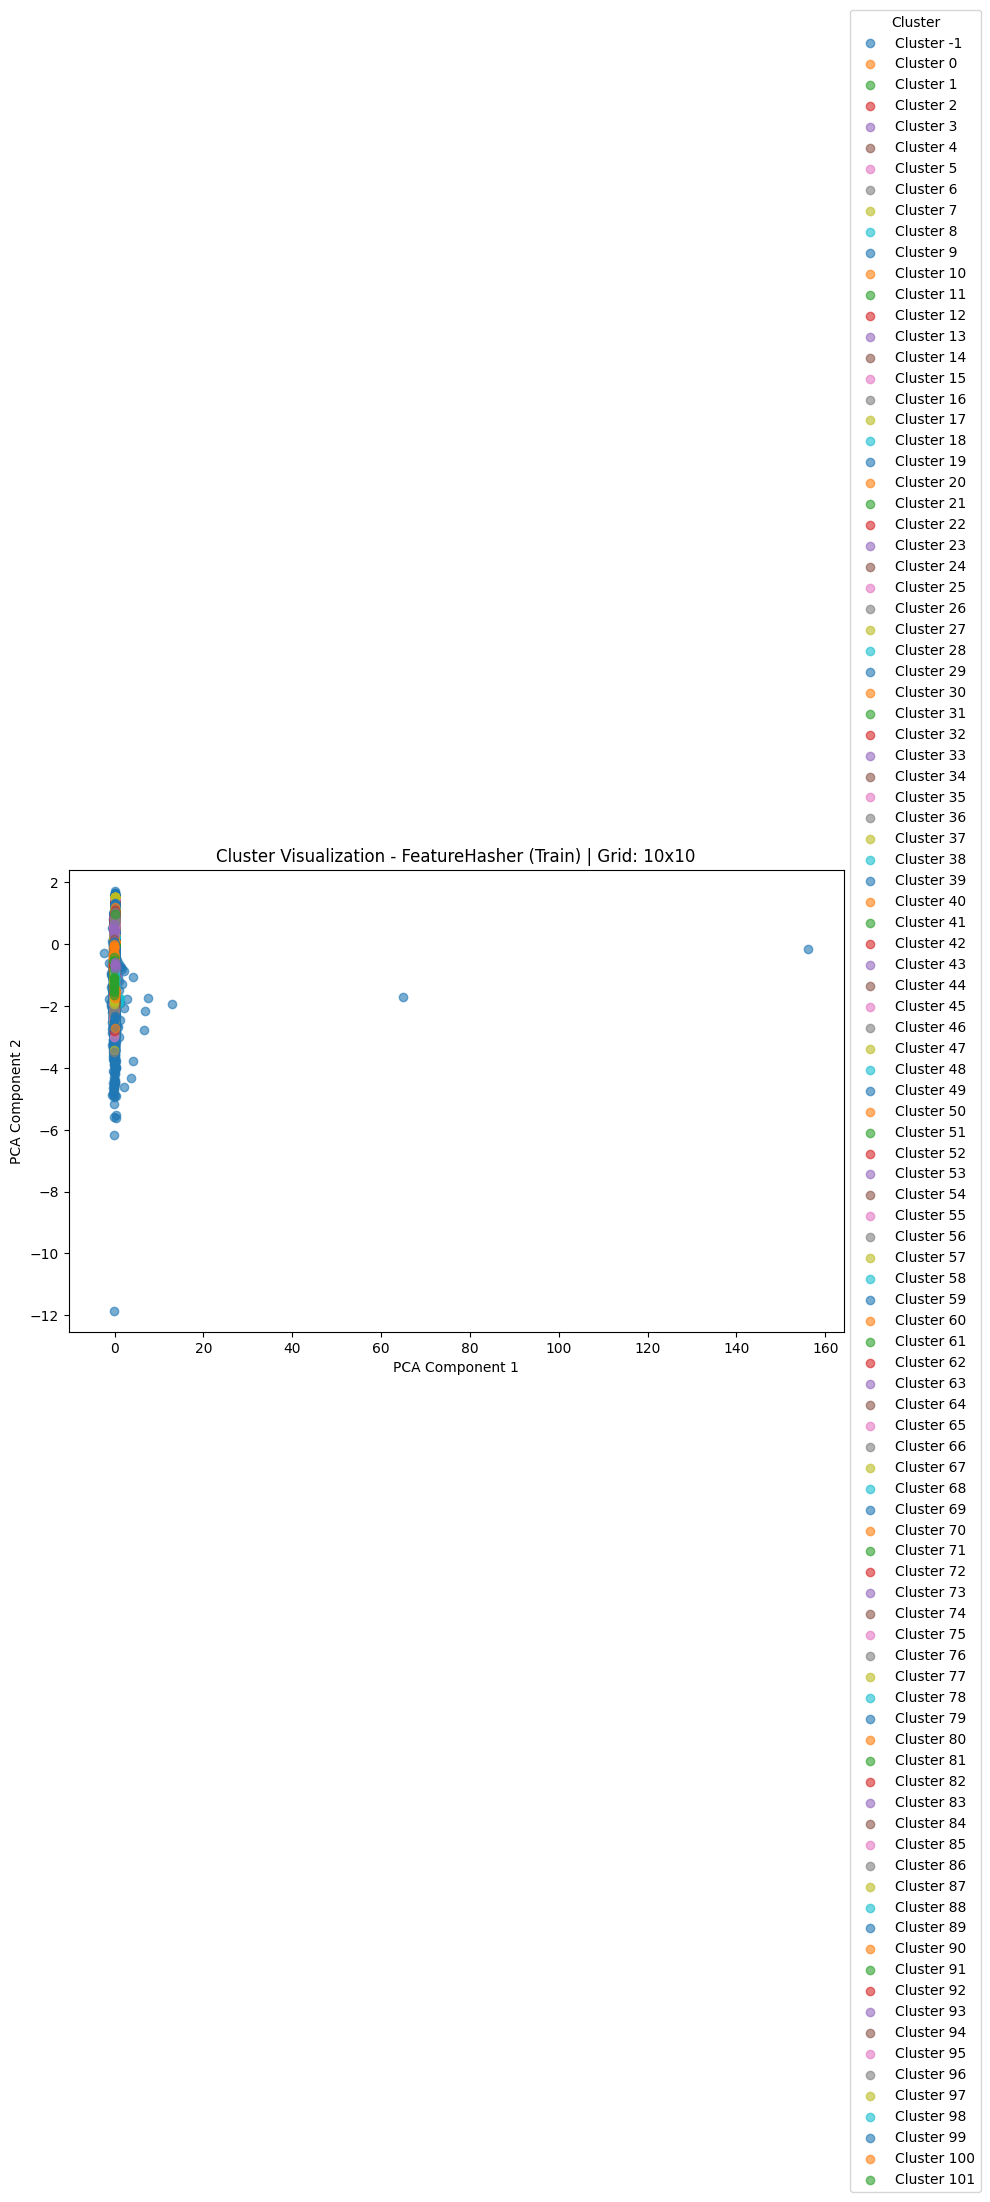

<ipython-input-17-9cf82592e9f9>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


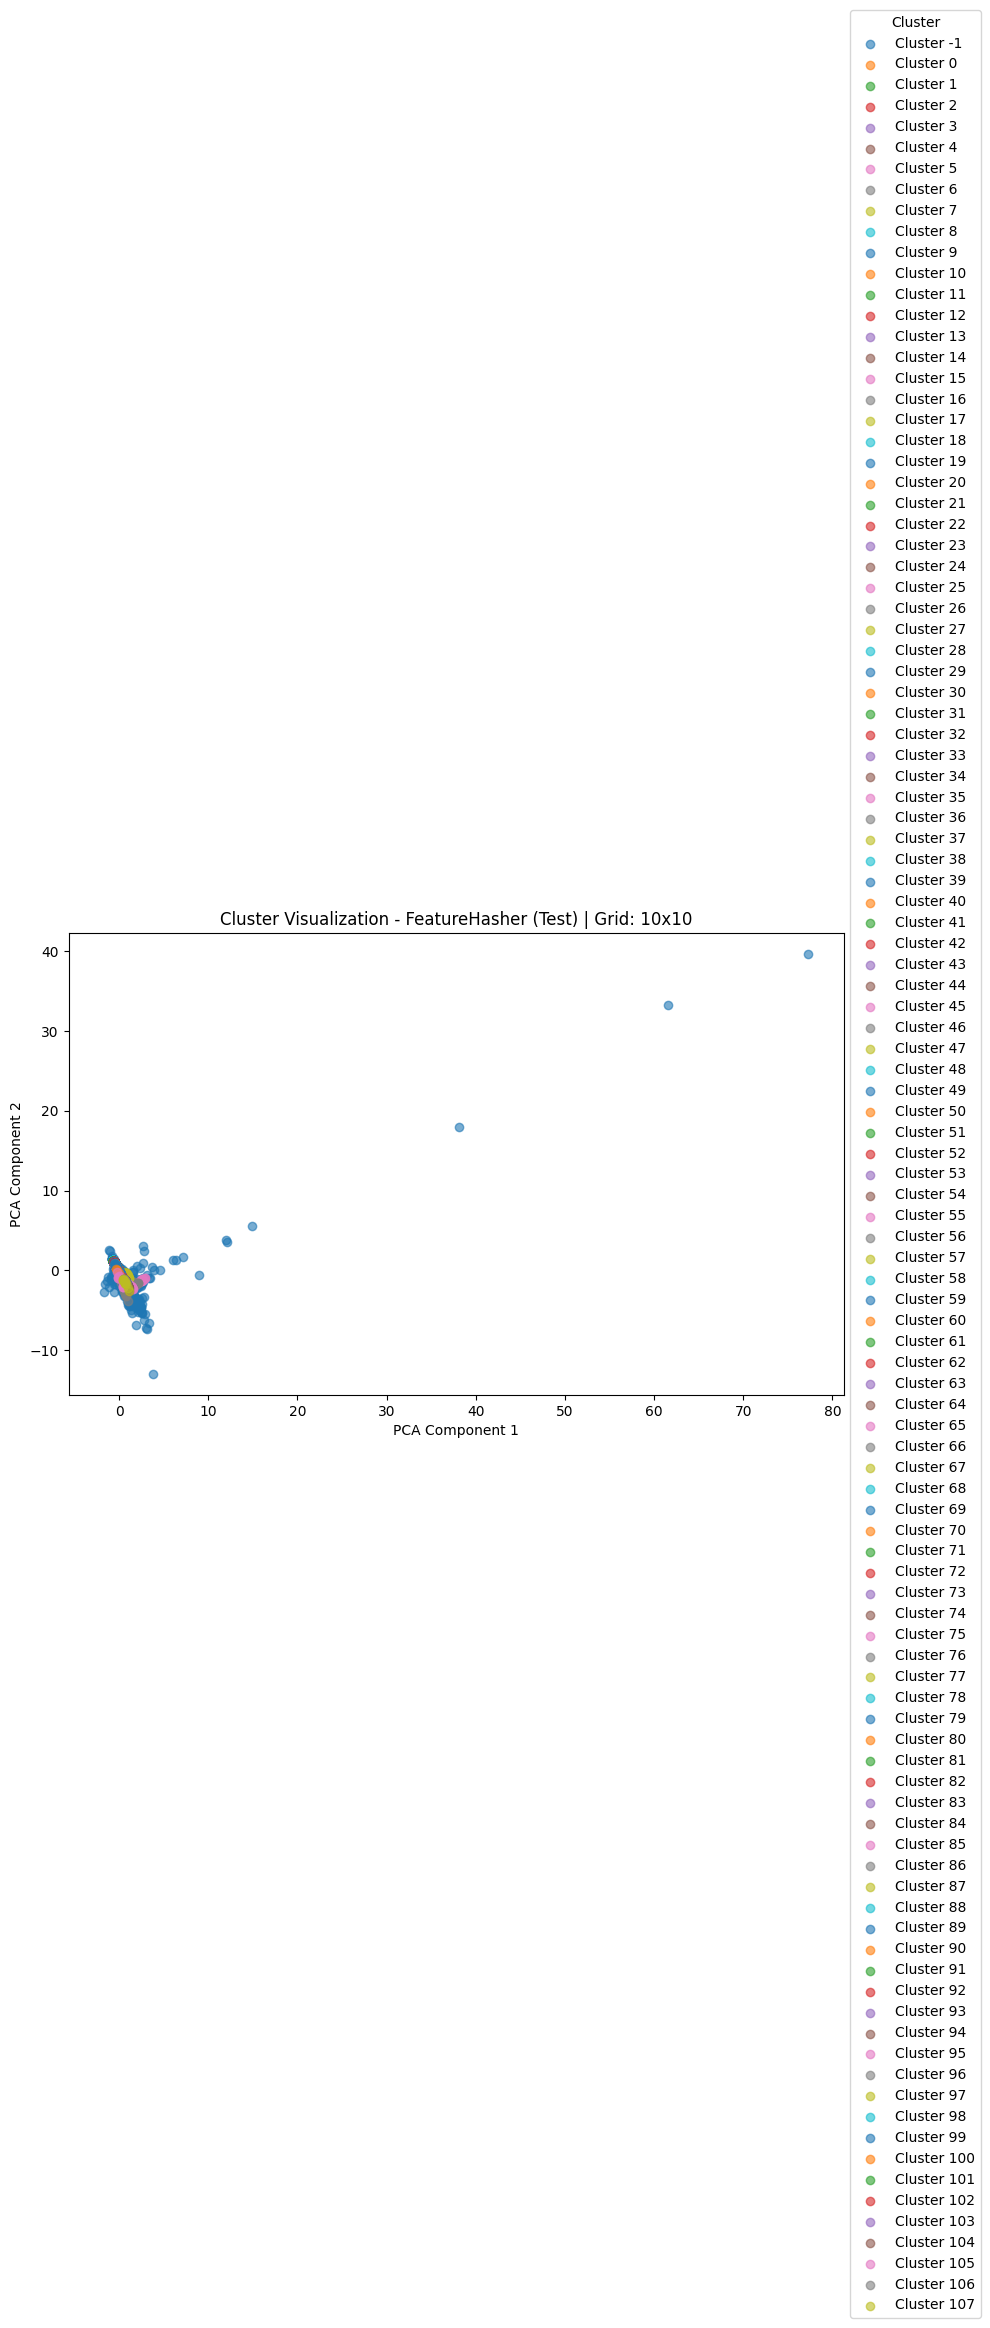

<ipython-input-17-9cf82592e9f9>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


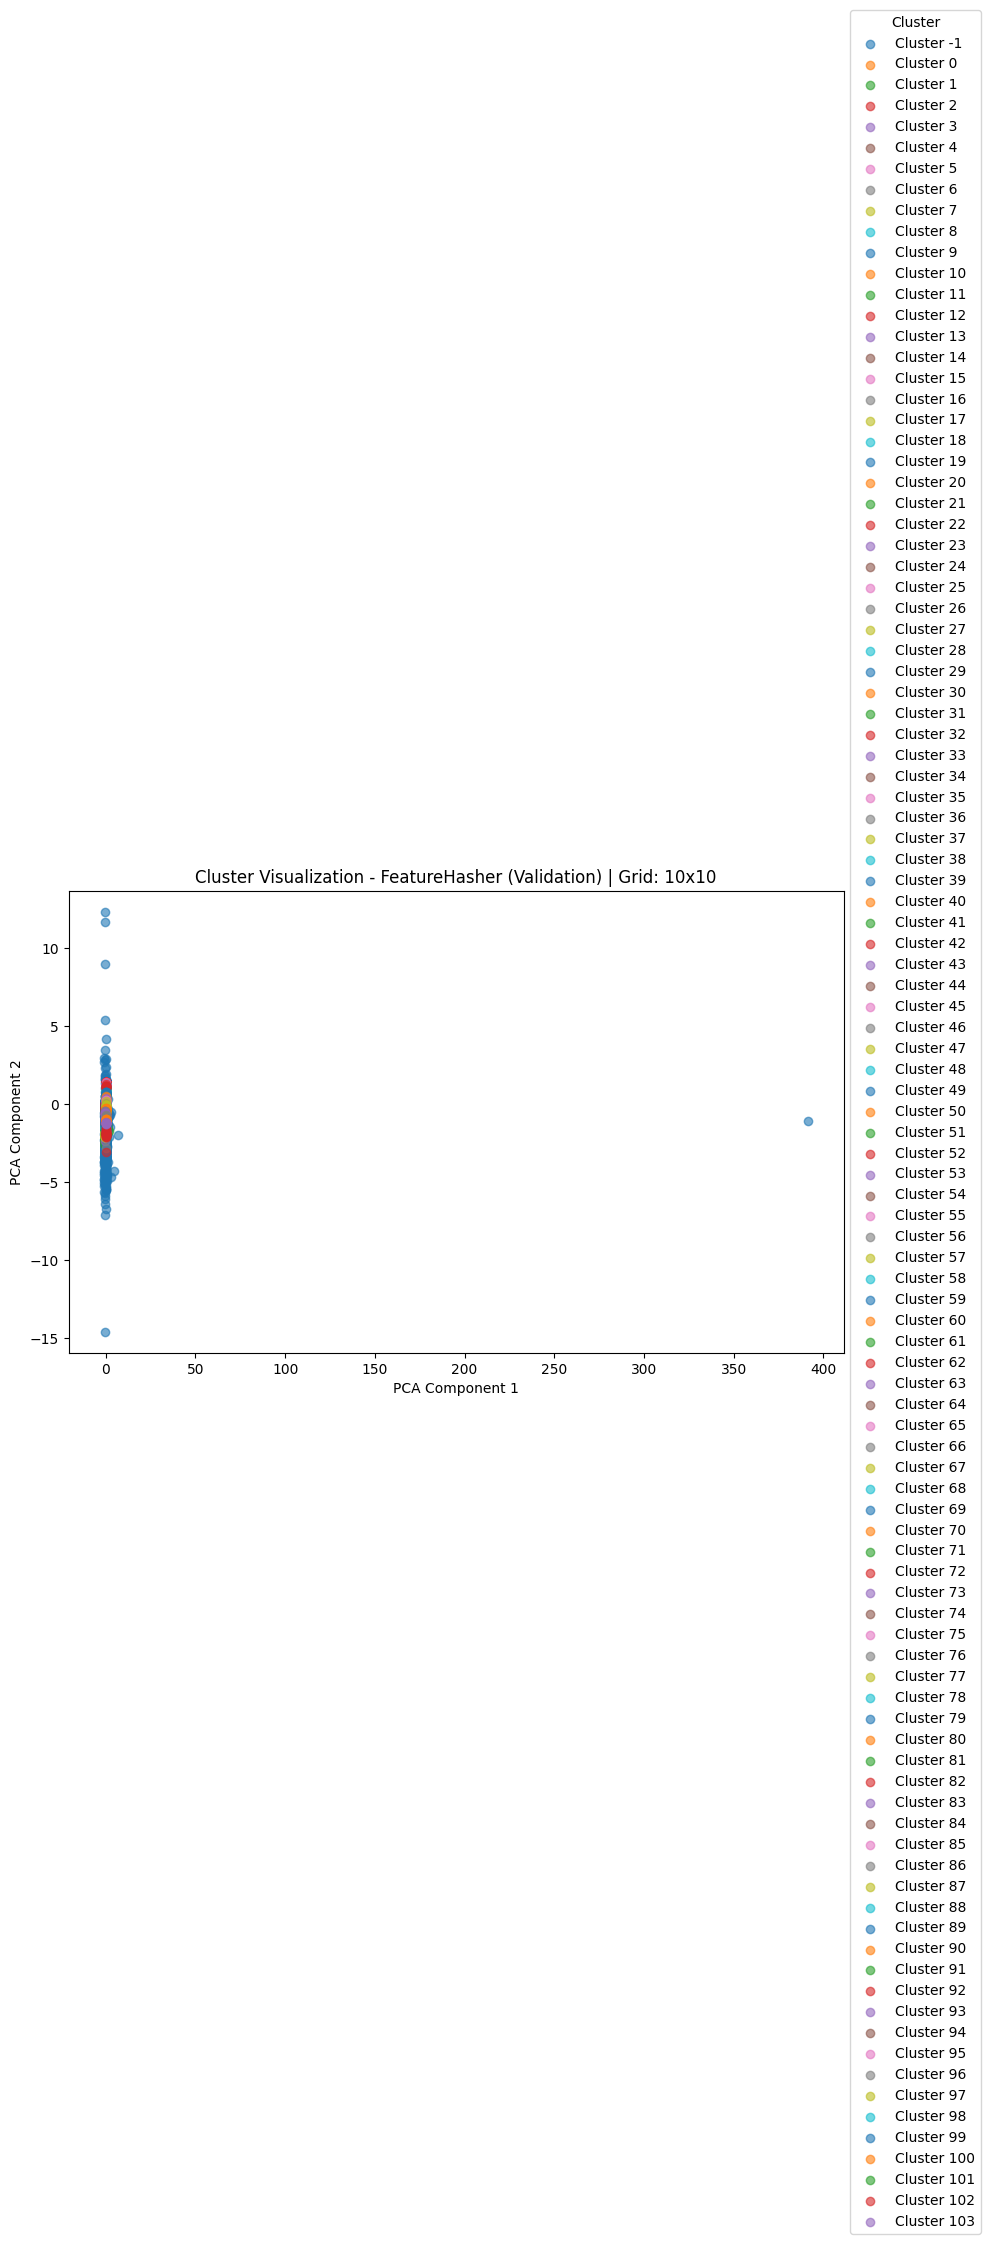

<ipython-input-17-9cf82592e9f9>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


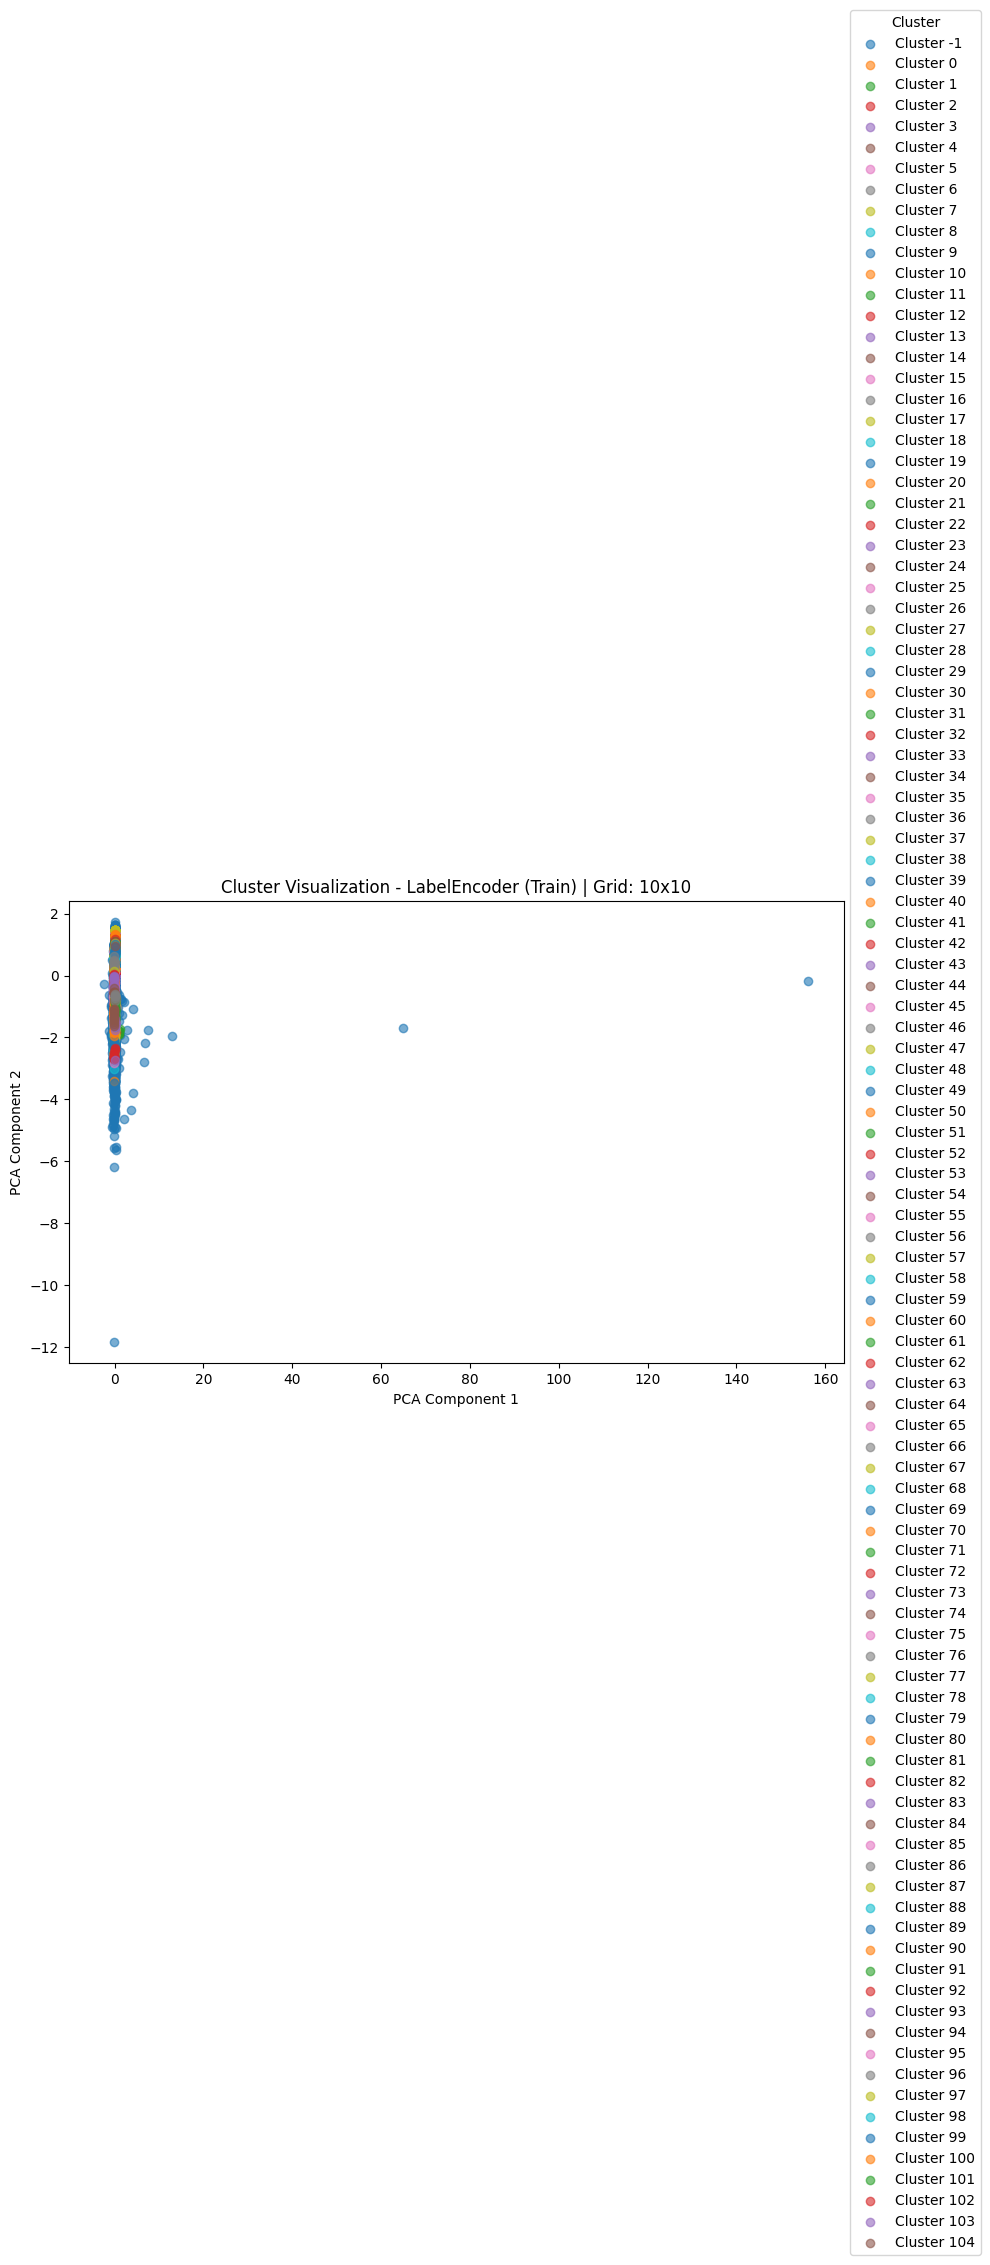

<ipython-input-17-9cf82592e9f9>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


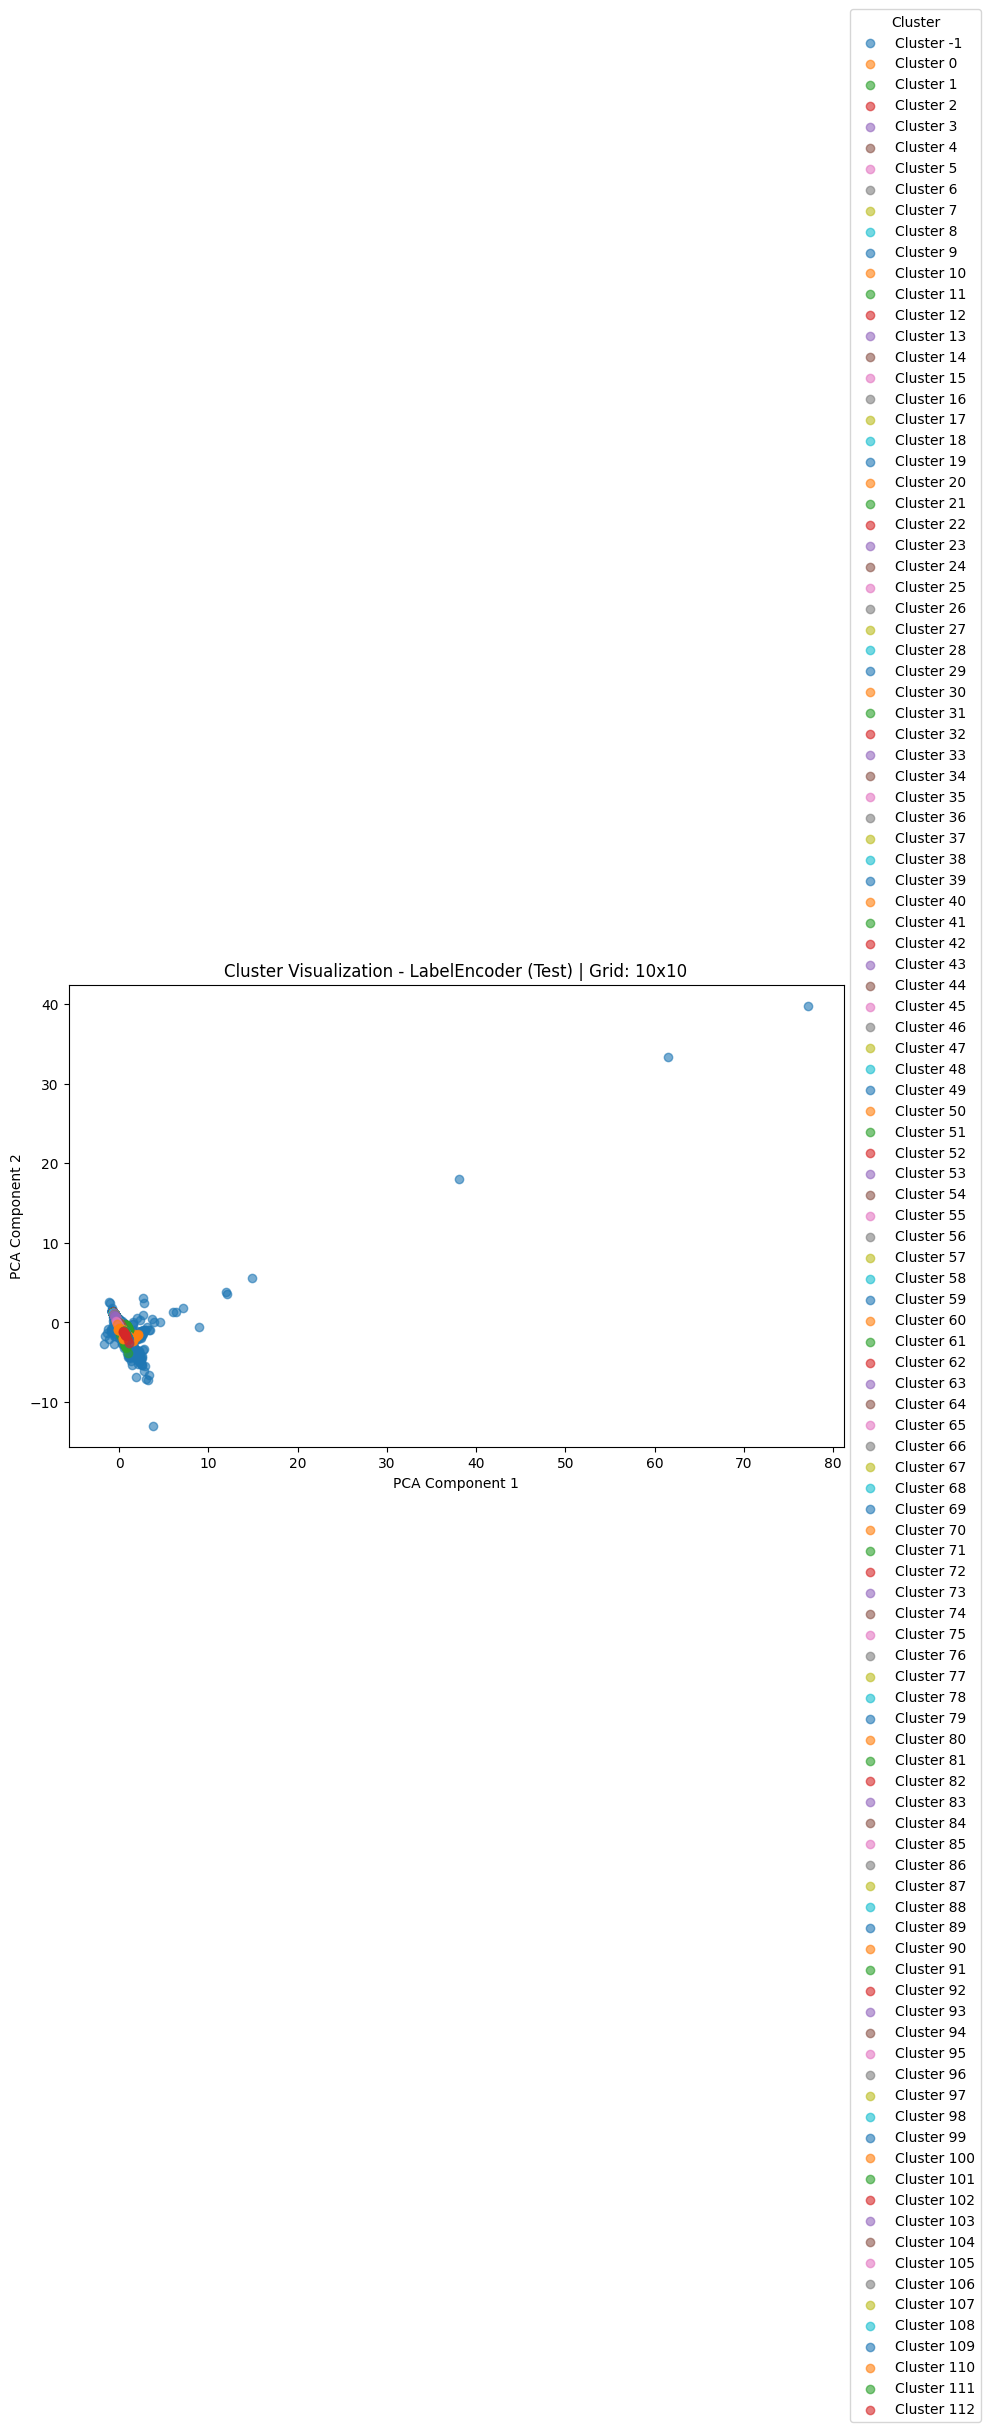

<ipython-input-17-9cf82592e9f9>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


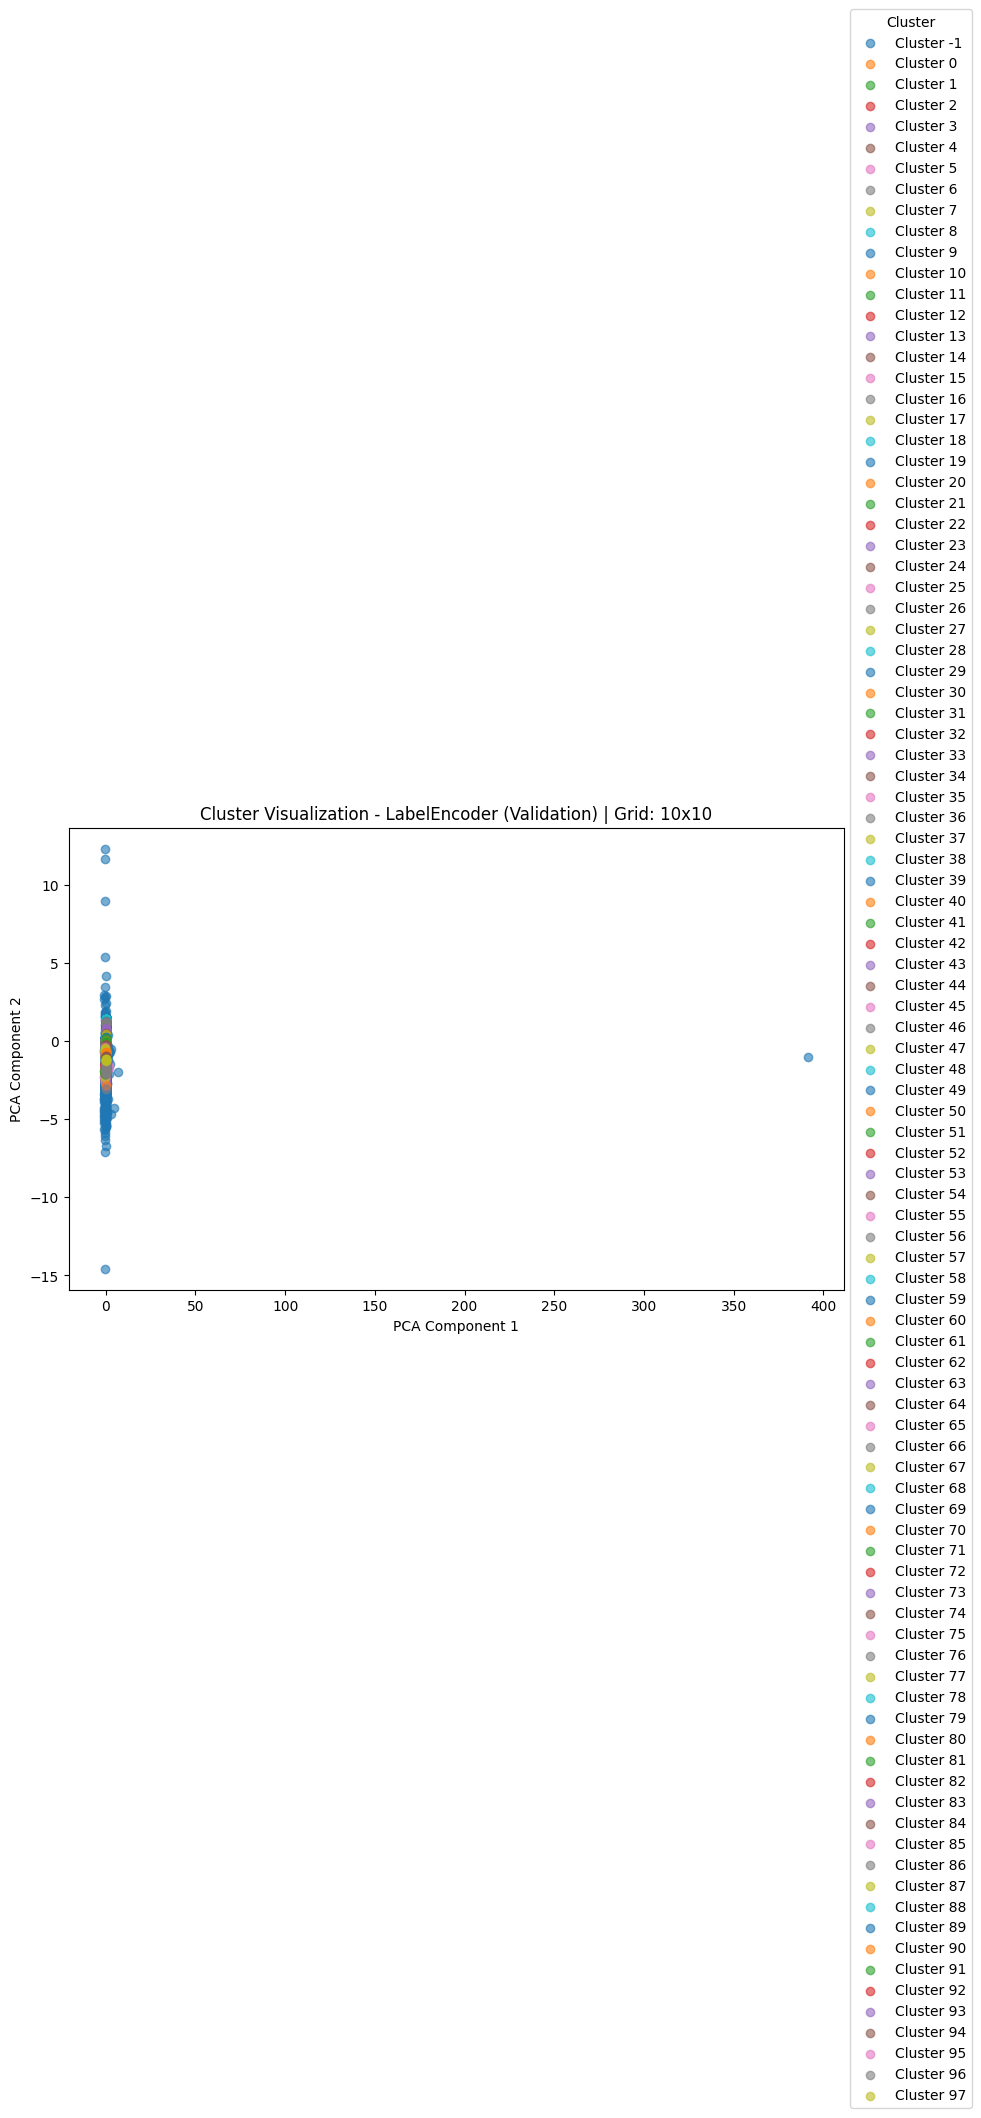

                            Encoding Type n_clusters Silhouette Score  \
Train (FeatureHasher)       FeatureHasher        102         0.662096   
Test (FeatureHasher)        FeatureHasher        108         0.678882   
Validation (FeatureHasher)  FeatureHasher        104         0.662648   
Train (LabelEncoder)         LabelEncoder        105         0.660848   
Test (LabelEncoder)          LabelEncoder        113         0.669762   
Validation (LabelEncoder)    LabelEncoder         98         0.668101   

                           Davies-Bouldin Index Calinski-Harabasz Index  \
Train (FeatureHasher)                  0.486994              994.292813   
Test (FeatureHasher)                   0.440495              664.525723   
Validation (FeatureHasher)             0.452193              637.424863   
Train (LabelEncoder)                   0.496102               969.02028   
Test (LabelEncoder)                    0.445605              686.858146   
Validation (LabelEncoder)             

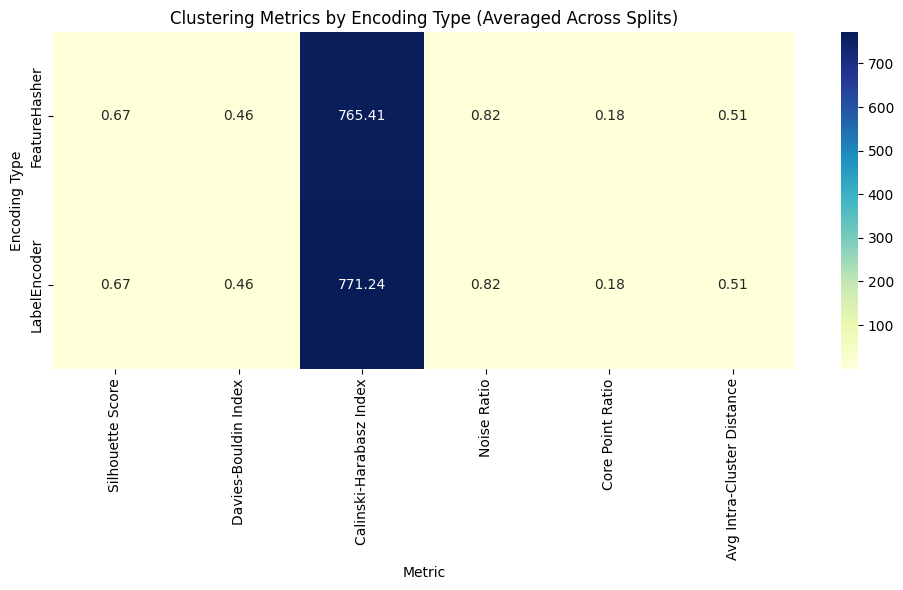

In [ ]:
######################################################################################################################
# Call the main function
######################################################################################################################

if __name__ == '__main__':
    combined_results = main()

In [ ]:
######################################################################################################################
# print combined results
# write results file to csv
######################################################################################################################

print(combined_results)

#results_df = pd.DataFrame(results_table)
write_labeled_df_tocsv_timestamp(output_file, output_dir, timestamp)

                            Encoding Type n_clusters Silhouette Score  \
Train (FeatureHasher)       FeatureHasher        102         0.662096   
Test (FeatureHasher)        FeatureHasher        108         0.678882   
Validation (FeatureHasher)  FeatureHasher        104         0.662648   
Train (LabelEncoder)         LabelEncoder        105         0.660848   
Test (LabelEncoder)          LabelEncoder        113         0.669762   
Validation (LabelEncoder)    LabelEncoder         98         0.668101   

                           Davies-Bouldin Index Calinski-Harabasz Index  \
Train (FeatureHasher)                  0.486994              994.292813   
Test (FeatureHasher)                   0.440495              664.525723   
Validation (FeatureHasher)             0.452193              637.424863   
Train (LabelEncoder)                   0.496102               969.02028   
Test (LabelEncoder)                    0.445605              686.858146   
Validation (LabelEncoder)             

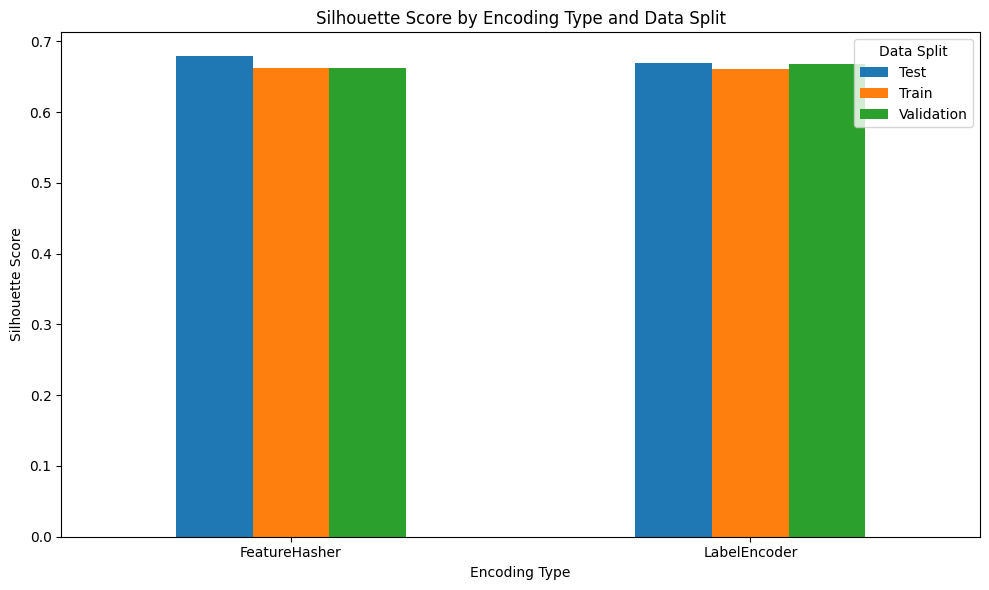

In [ ]:
######################################################################################################################
#plot metrics
######################################################################################################################

plot_metrics(combined_results)

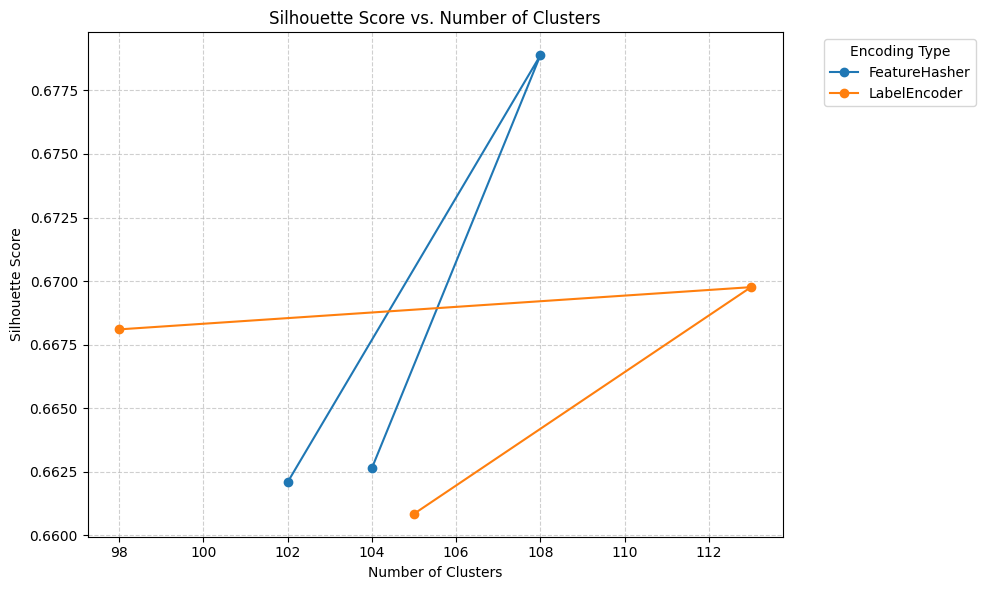

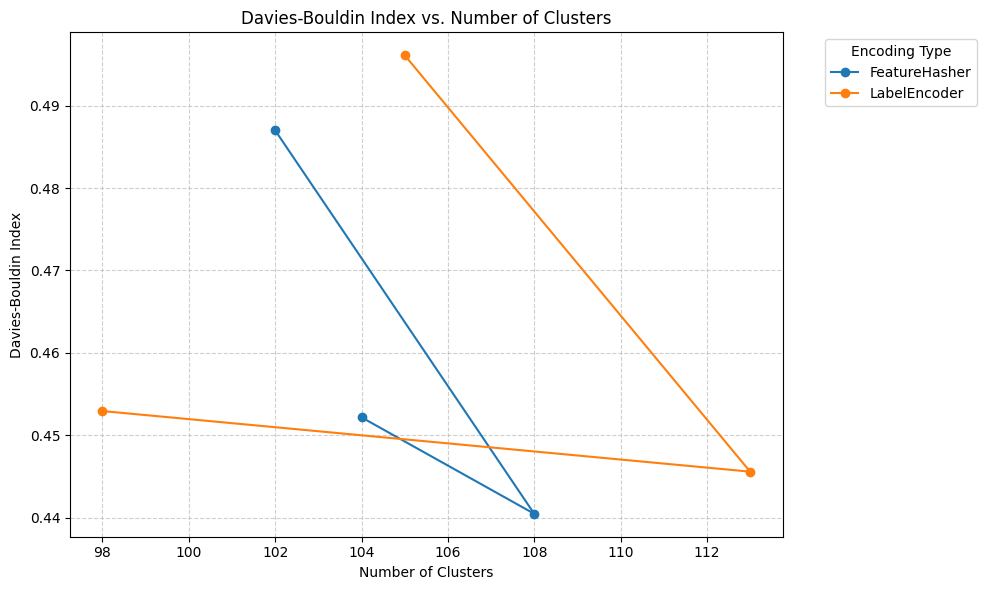

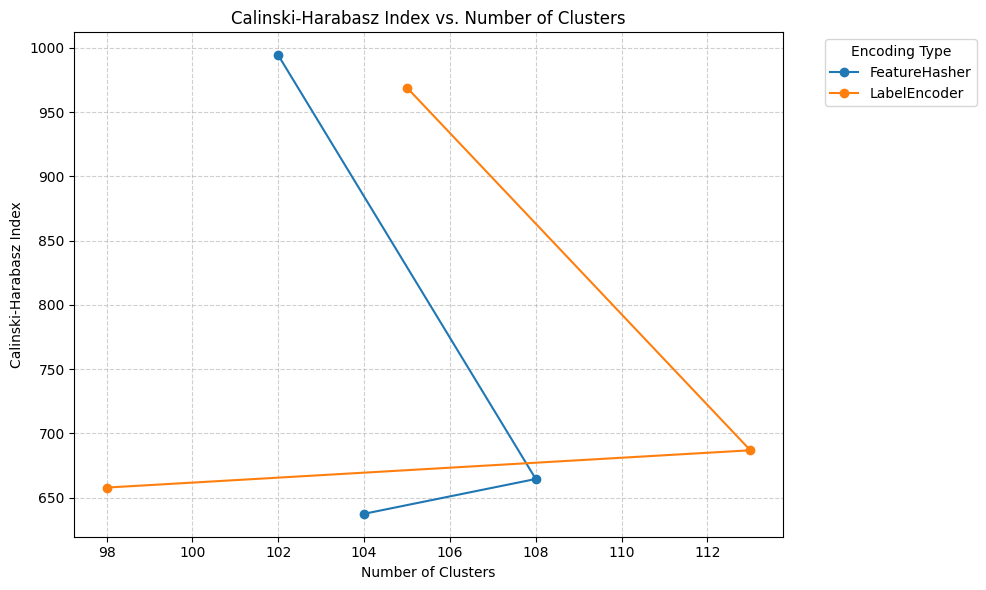

In [ ]:
######################################################################################################################
# Call visualization of Metrics over Clusters Function
# Plot how evaluation metric changes as the number of clusters increases, for each encoding type.
######################################################################################################################

plot_metric_over_clusters(combined_results, metric='Silhouette Score')
plot_metric_over_clusters(combined_results, metric='Davies-Bouldin Index')
plot_metric_over_clusters(combined_results, metric='Calinski-Harabasz Index')

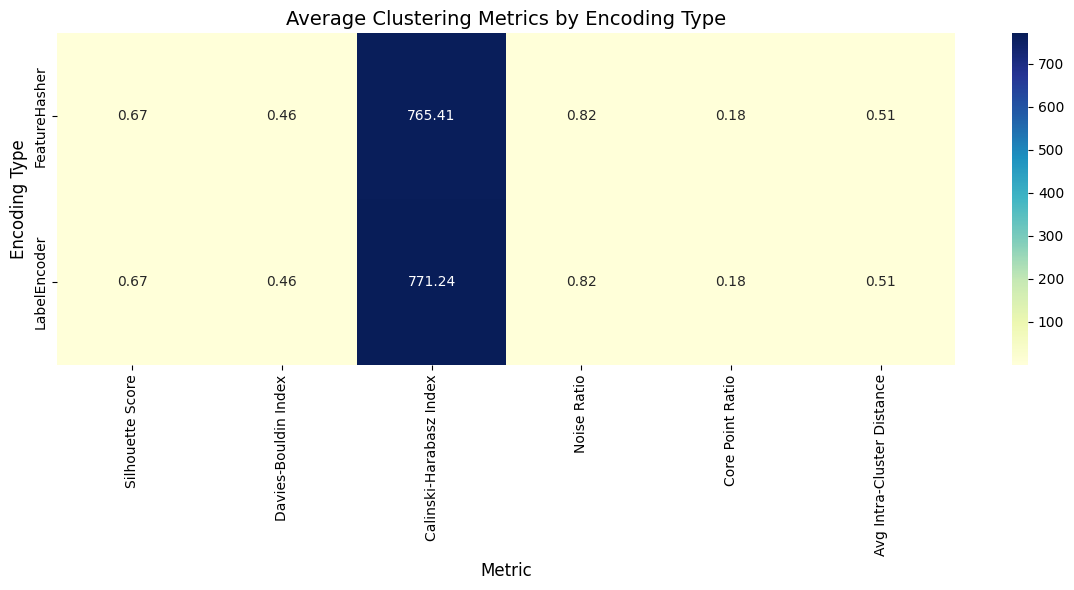

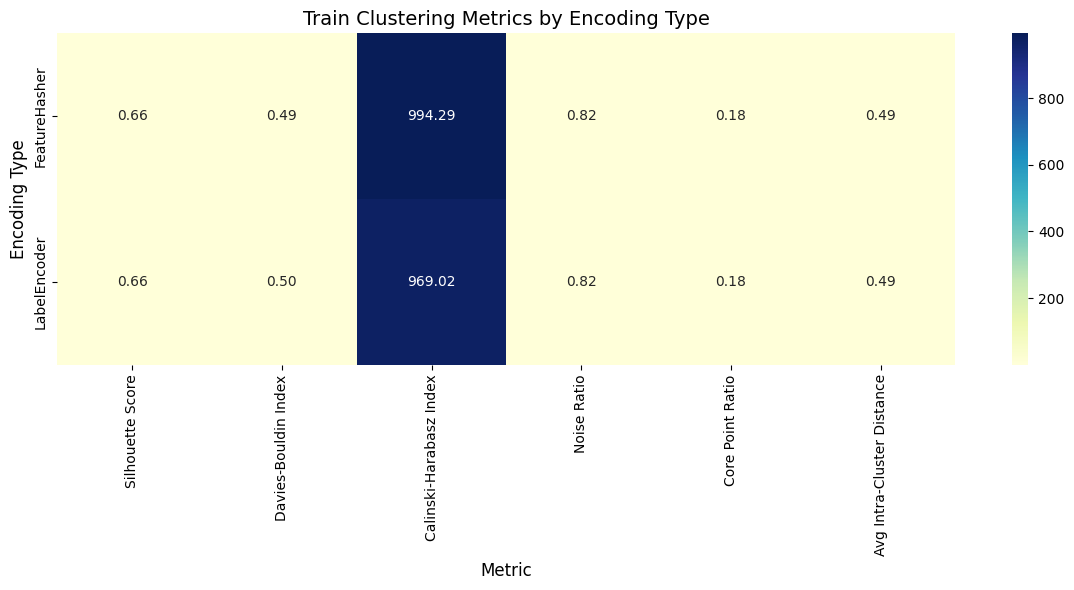

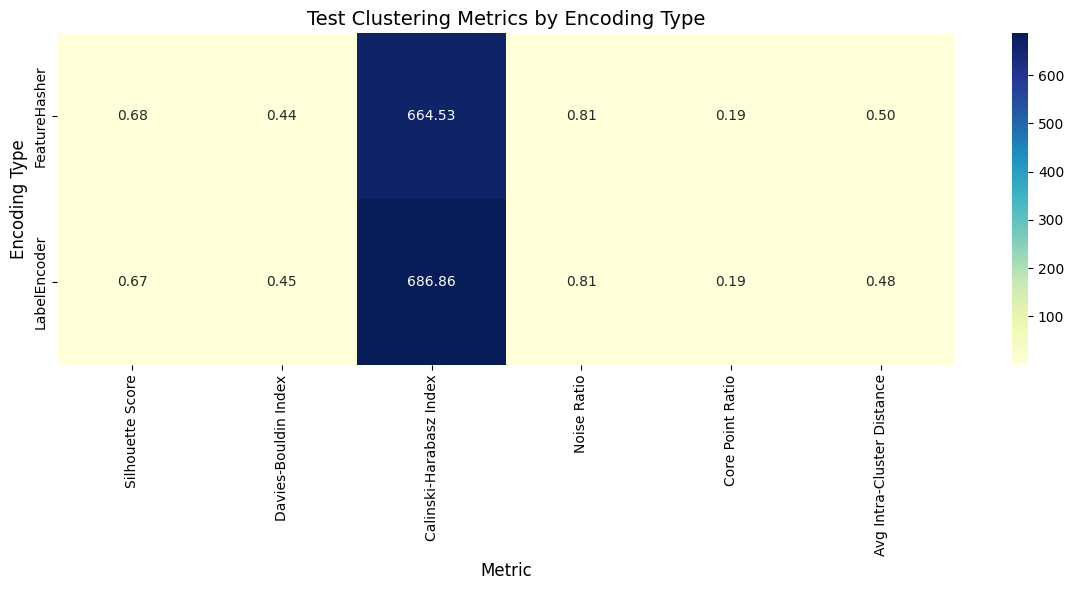

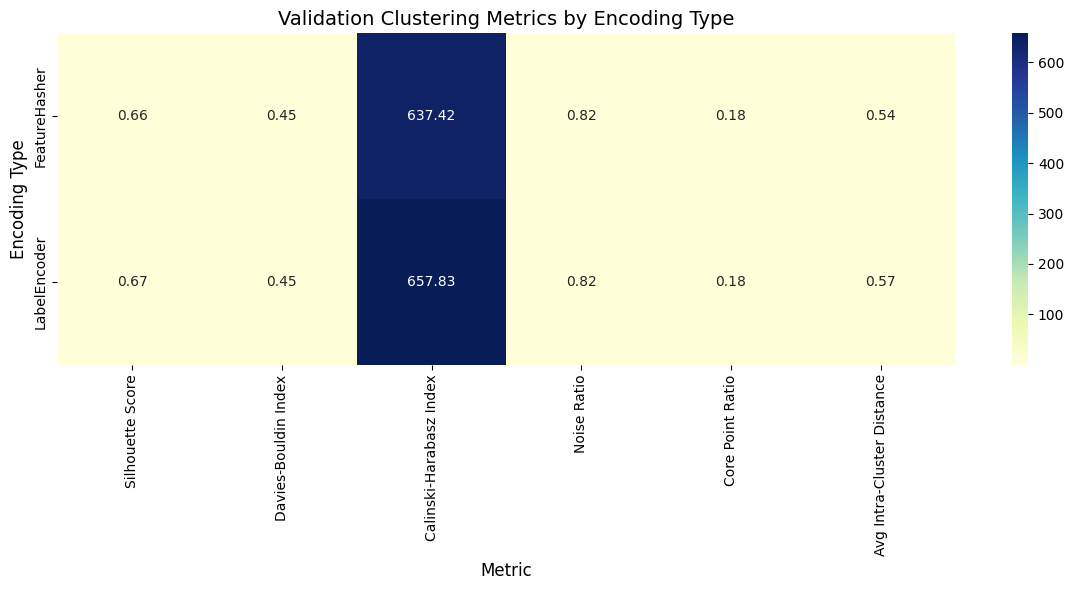

In [ ]:
######################################################################################################################
# Visualization of Encoder Heatmap
# Plot the heatmap using seaborn
# - annot=True: show metric values in the heatmap cells
# - fmt=".2f": format numbers to 2 decimal places
# - cmap="YlGnBu": color map from yellow to green to blue
# - cbar=True: display color bar legend
######################################################################################################################

plot_encoder_metric_heatmap(combined_results)
plot_encoder_metric_heatmaps_by_split(combined_results)

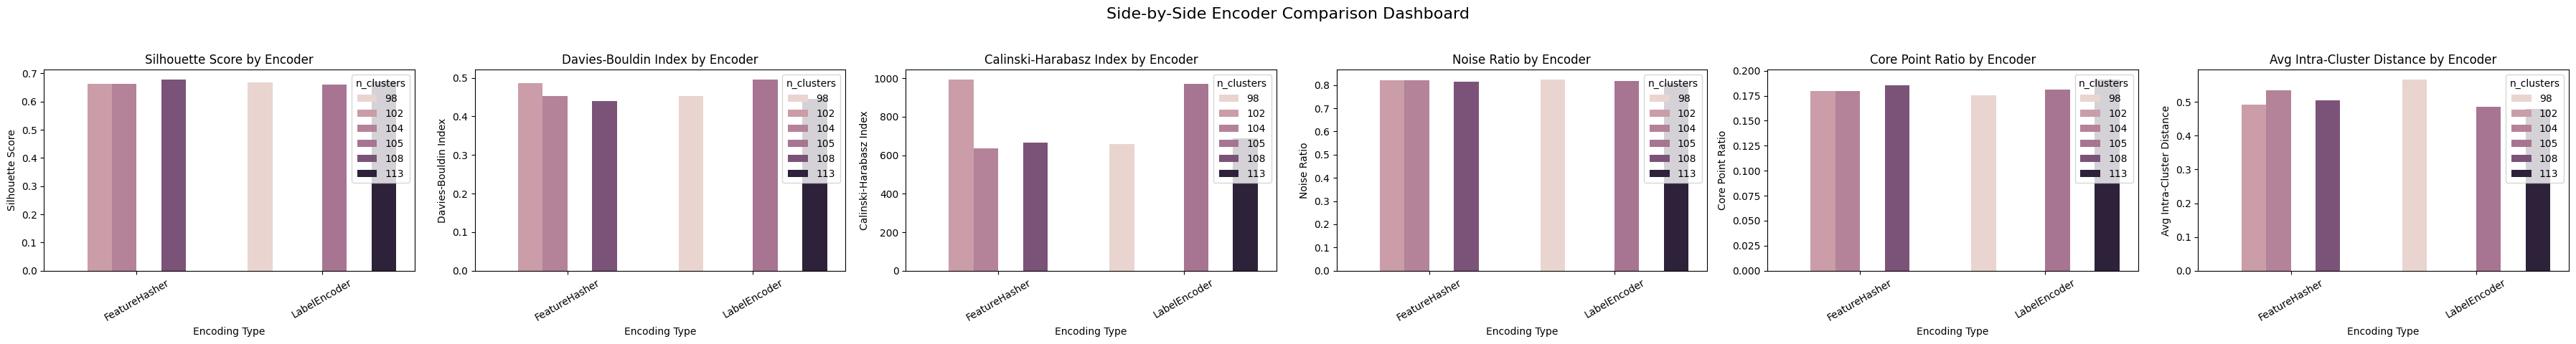

In [ ]:
######################################################################################################################
# Visualization of Encoder Comparison Dashboard
# Use seaborn to plot a bar chart for the current metric
# - x: Encoding Type
# - y: Metric value
# - hue: n_clusters to show performance variation by cluster count
######################################################################################################################

plot_encoder_comparison_dashboard(combined_results)

In [ ]:
######################################################################################################################
# Visualization of Leaderboard Table
# Call visualizaton of leaderboard function
# Create metrics list
# Disply Leaderboaed Table
######################################################################################################################

metrics = [
    'Silhouette Score',
    'Davies-Bouldin Index',
    'Calinski-Harabasz Index'
]

leaderboard_df = combined_results.groupby('Encoding Type')[metrics].mean()
print("Leaderboard (average across n_clusters):")
print(leaderboard_df.round(3))

Leaderboard (average across n_clusters):
              Silhouette Score Davies-Bouldin Index Calinski-Harabasz Index
Encoding Type                                                              
FeatureHasher         0.667875             0.459894              765.414466
LabelEncoder          0.666237             0.464887              771.235536


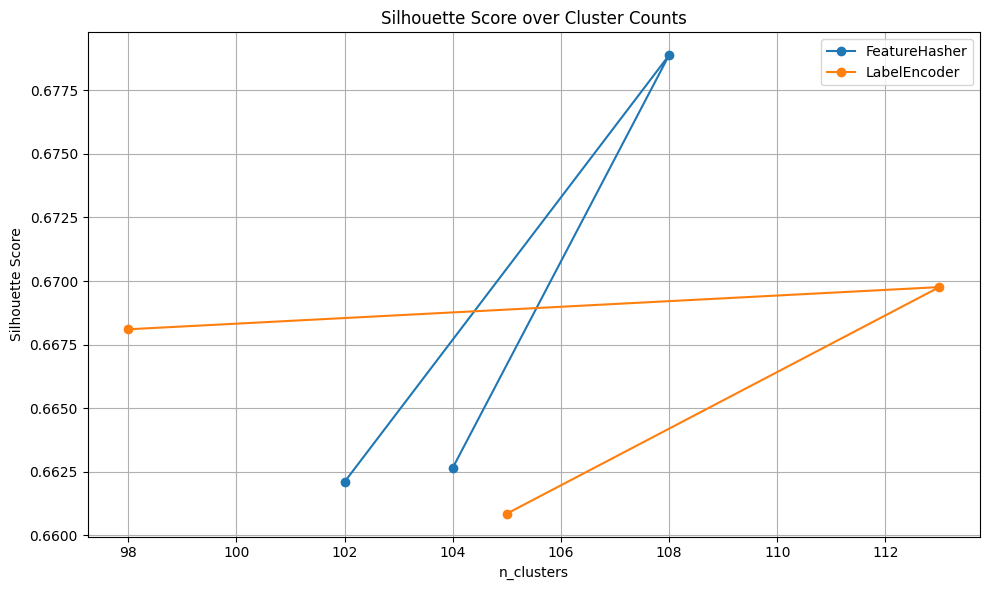

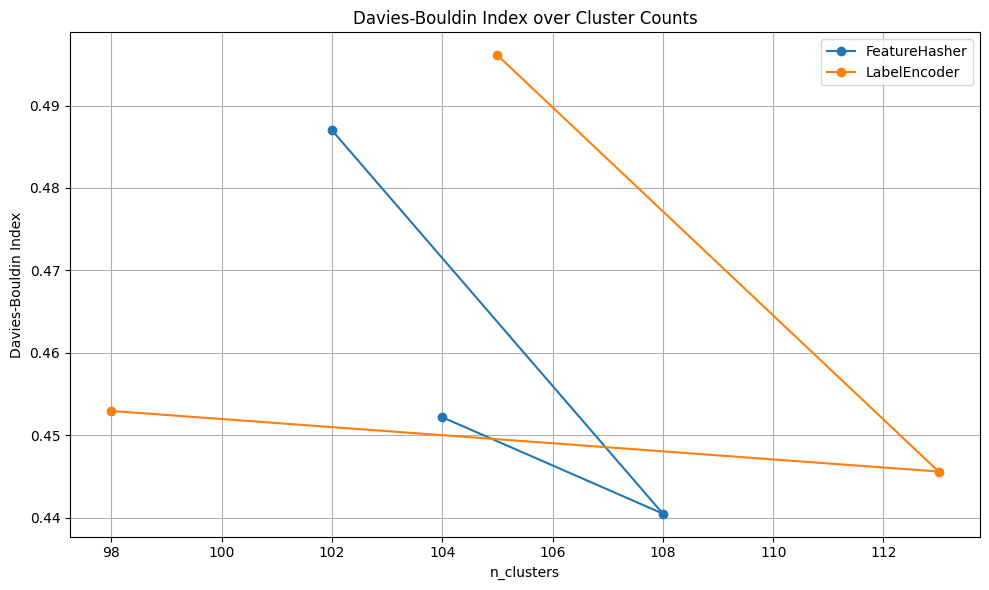

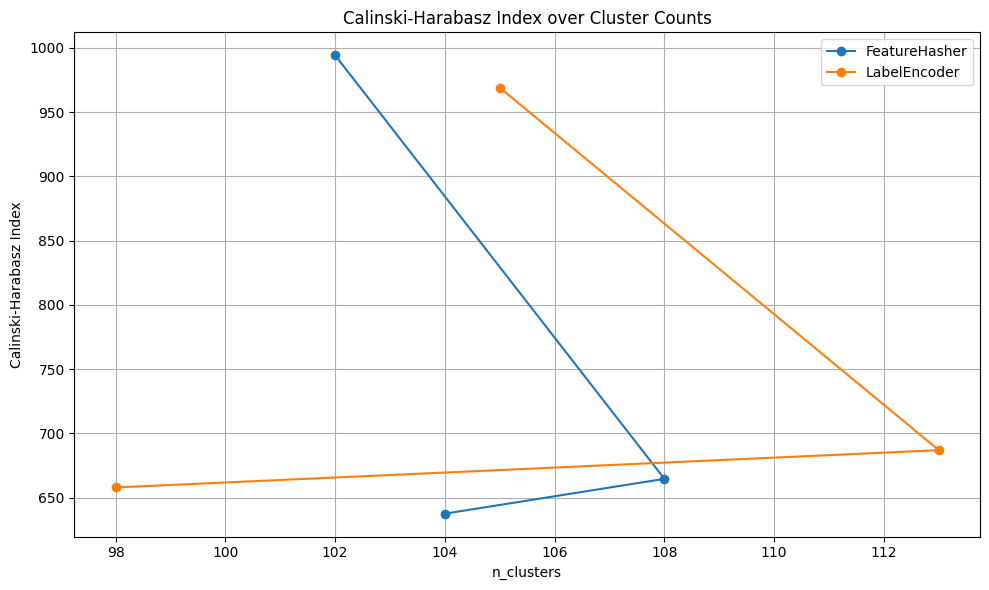

In [ ]:
######################################################################################################################
# Visualization of Metric Trends
# Plot the metric values against the number of clusters
# Use markers to emphasize each point and label the line with the encoding name
######################################################################################################################

plot_metric_trends(combined_results, metric='Silhouette Score')
plot_metric_trends(combined_results, metric='Davies-Bouldin Index')
plot_metric_trends(combined_results, metric='Calinski-Harabasz Index')


<ipython-input-26-7142594651ef>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rank_scores.values, y=rank_scores.index, palette="coolwarm")


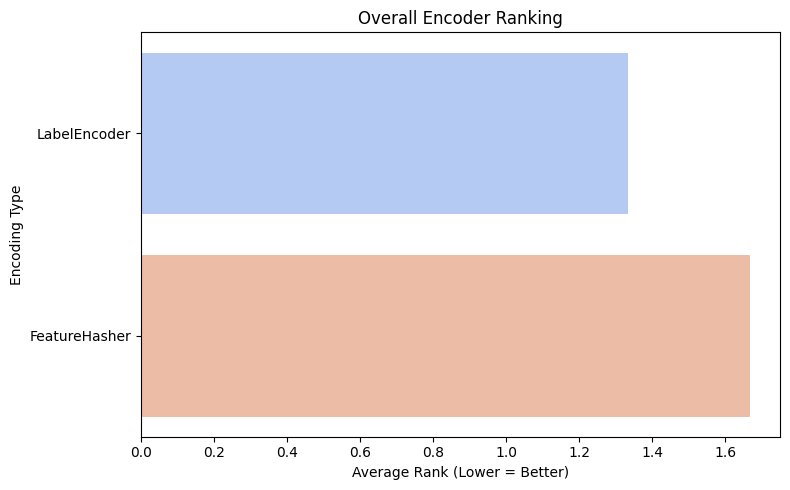

In [ ]:
######################################################################################################################
# Visualization of Encoder Ranking
# Plot a horizontal bar chart of average ranks
# Lower values (top of the chart) represent better-performing encodings
######################################################################################################################

plot_encoder_ranking(combined_results, metrics)

In [ ]:
######################################################################################################################
# Visualization of Bubble Chart with Cluster Gradient
#    Bubble chart:
#    - X-axis: Silhouette Score
#    - Y-axis: Adjusted Rand Index (ARI)
#    - Bubble size: normalized Inertia
#    - Color: gradient based on n_clusters

######################################################################################################################

#plot_bubble_chart_with_cluster_gradient(combined_results)